### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [ ]:
# nb_fname = "XXX.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [ ]:
NAME1 = "" 
NAME2 = ""
GROUP = ""

### Check Python version

In [ ]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [ ]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [ ]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [ ]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

# HA1 - Cats and dogs

<img src="https://cdn.pixabay.com/photo/2015/05/20/10/03/cat-and-dog-775116_960_720.jpg" alt="Image of cats and dogs" style="width: 500px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colour images of dogs and cats. Our goal with this dataset will be to create a classifier that can tell us if the input image is of a cat or a dog.

## Using your cloud GPU
As a way of helping you speed up the training process, each group gets access to a cloud instance with a GPU. Take a look at the [instructions folder](https://github.com/JulianoLagana/deep-machine-learning/blob/master/instructions/) to understand how to connect to an instance and use our tools there. You're free to use this limited resource as you see fit, but if you spend all your credits, you'll need a late day to obtain more (and you can only do this once).

### Strong recommendation:
In order to make the most out of your GPU hours, first try solving the initial part of this notebook (tasks 0-3) in your own computer (these tasks can be solved on the CPU), and leave most of the available hours for solving tasks 4-5, and refining your best model further (and, if you have the spare hours, experiment a bit!).

### Working efficiently:
Training for several epochs just to have your code break at the last validation step is incredibly frustrating and inefficient. Good practice is to first test long training runs with a much simpler dry-run: a single epoch, a few batches et c.

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance. When experimenting, a single epoch is often enough to tell whether your model setup has improved or not.


Hints:
- If you get errors saying you've exhausted the GPU resources, well, then you've exhausted the GPU resources. However, sometimes that's because `pytorch` didn't release a part of the GPU's memory. If you think your CNN should fit in your memory during training, try restarting the kernel and directly training only that architecture.
- Every group has enough cloud credits to complete this assignment. However, this statement assumes you'll use your resources judiciously (e.g. always try the code first in your machine and make sure everything works properly before starting your instances) and **won't forget to stop your instance after using it,**  otherwise you might run out of credits.
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).
- Solving the [computer labs](https://github.com/JulianoLagana/deep-machine-learning/tree/master/computer-labs) is a good way to get prepared for this assignment.

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [1]:
# YOUR CODE HERE
import os
import torch
from argparse import ArgumentParser
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
#torch.cuda.set_device(0)
#CUDA_VISIBLE_DEVICES=1

from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  torch.utils.data import random_split
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch import nn
import torch.nn.functional as F
from torch import optim

#torch.cuda.set_device(1)


In [ ]:
print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())
print(torch.cuda.device(0))
# parser = ArgumentParser(description=‘Example’)
# parser.add_argument(’–gpu’, type=int, default=[0,1], nargs=’+’, help=‘used gpu’)

# args = parser.parse_args()
# os.environ[“CUDA_VISIBLE_DEVICES”] = ‘,’.join(str(x) for x in args.gpu)

---
## 1. Loading the data and preprocessing

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats/data) and download the data from there. You should download both the test and train folders together in one zip file (there is a `Download all` button at the bottom of the page). Unfortunately, you need to create a Kaggle account for this.

**Only necessary for tasks 4-6**: Downloading the data to your local computer is quite straight-forward. Sooner or later you will have to upload the data to the cloud instance and that is a bit more tricky. There are a few ways to do it:

 - Jupyter Notebook upload function. When starting the notebook server with the command `jupyter notebook` you are directed to a main page. In the top right corner there is an upload button.
 - Using [`scp`](https://linuxize.com/post/how-to-use-scp-command-to-securely-transfer-files/) to copy files via an ssh connection.
 - Using the [Kaggle CLI](https://github.com/Kaggle/kaggle-api). We have added it to the conda environment.

For this assignment we will again need data loaders. Like before we need to create a `Dataset` to give as input to a `DataLoader`. 
Fortunately, this type of image data is quite common so we get some help from `pytorch`. We can use [`ImageFolder`](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) to create a `Dataset` for our images. As long as our folder structure for the data conforms to the folder structure expected by `ImageFolder`, we can use it right out of the box and the `DataLoader` class will happily accept it as input.

To use `ImageFolder` you should create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      cats        dogs       cats        dogs       cats        dogs       cats        dogs


The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`.
This is just a convenient way of having a smaller dataset to play with for faster prototyping.

We provide you a notebook that shows how to achieve this folder structure (`create_project_notebook_structure.ipynb`), starting from the original `dogs-vs-cats.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

For the smaller dataset, we advise you to use 70% of the data as training data (and thereby the remaining 30% for validation data). However, for the larger dataset, you should decide how to split between training and validation.

**What percentage of the larger dataset did you decide to use for training?**

**Your answer:** Our original train dataset (train_all) have 25000 samples. We would like to choose 6% for validation set and 94% for train set. So we would have 1500 samples including 750 dogs and 750 cats for validation set (6% out of 25000 samples) and 23500 samples including 11750 dogs and 11750 for cats (94% out of 25000 samples).

**Optional (1 POE):** Did you decide to keep the same ratio split between train and validation sets for the larger dataset? Motivate your decision!


**Your answer:** No, We would like to choose 6% for validation set and 94% for train set. Our larger dataset has 25000 samples for training and 12500 samples for test.

Fill in the dataset paths (to be used later by your data loaders):

In [2]:
# TODO: Change the directories accordingly
# YOUR CODE HERE
train_path = "/train"
val_path = "/val"
small_train_path = "/small_train"
small_val_path = "/small_val"


---
### 1.1 Preprocessing
**(1 POE)** 

Once you have the expected folder structure, create two data loaders for automatically generating batches from the images in your smaller subset of data. It is here we choose how to preprocess the input data. There are multiple reasons for why we preprocess data:

- Some transformations might be needed to actually make the data work with our network (reshaping, permuting dimensions et c.).
- Make the training more efficient by making the input dimensions smaller, e.g. resizing, cropping.
- Artificially expanding the training data through [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/)
- We have some clever idea of how to change the data to make the training process better.

We do not expect you to do data augmentation, but feel free to preprocess the data as you see fit.
Construct an `ImageFolder` dataset like this:

```python
ImageFolder(<path_to_data_folder>, transform=Compose(<list_of_transforms>))
# example:
ImageFolder(Path.cwd() / "small_train", transform=Compose([ToTensor]))
```

Hints:
- Take a look at [`ImageFolder`](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) and [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) from the pytorch docs.
- To preprocess the data you can use the built-in pytorch [`Transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html)
- The `ImageFolder` dataset provides the data as a python image type. For easy conversion to a `torch.Tensor`, use the [`ToTensor`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) transformation.
- The specified `batch_size` should be chosen so that you train fast but don't run out of memory. You need to figure this out empirically; start small and increase the batch size until you run out of memory.
- The `DataLoader` constructor takes an optional argument `num_workers`, which defaults to `0` if not provided. Setting a higher number creates multiple threads which load batches concurrently. This can speed up training considerably.  
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. Resizing the images can be done using the previously mentioned built-in pytorch Transforms.
- Resizing the images to a smaller size while loading them can be beneficial. The VGG network that is used later in this assignment requires that images are at least 224x224, but before that use small images to speed up training. The CNN's do surprisingly well on 64x64 or even 32x32 images. Shorter training cycles give your more time to experiment!

We encourage you to explore the data and choose transformations that you believe to be useful. For exploration we provide you with some helper functions to visually compare transformations side by side:

In [3]:
def compare_transforms(transformations, index):
    """Visually compare transformations side by side.
    Takes a list of ImageFolder datasets with different compositions of transformations.
    It then display the `index`th image of the dataset for each transformed dataset in the list.
    
    Example usage:
        compare_transforms([dataset_with_transform_1, dataset_with_transform_2], 0)
    
    Args:
        transformations (list(ImageFolder)): list of ImageFolder instances with different transformations
        index (int): Index of the sample in the ImageFolder you wish to compare.
    """
    
    # Here we combine two neat functions from basic python to validate the input to the function:
    # - `all` takes an iterable (something we can loop over, like a list) of booleans
    #    and returns True if every element is True, otherwise it returns False.
    # - `isinstance` checks whether a variable is an instance of a particular type (class)
    if not all(isinstance(transf, ImageFolder) for transf in transformations):
        raise TypeError("All elements in the `transformations` list need to be of type ImageFolder")
        
    num_transformations = len(transformations)
    fig, axes = plt.subplots(1, num_transformations)
    
    # This is just a hack to make sure that `axes` is a list of the same length as `transformations`.
    # If we only have one element in the list, `plt.subplots` will not create a list of a single axis
    # but rather just an axis without a list.
    if num_transformations == 1:
        axes = [axes]
        
    for counter, (axis, transf) in enumerate(zip(axes, transformations)):
        axis.set_title("transf: {}".format(counter))
        image_tensor = transf[index][0]
        display_image(axis, image_tensor)

    plt.show()

def display_image(axis, image_tensor):
    """Display a tensor as image
    
    Example usage:
        _, axis = plt.subplots()
        some_random_index = 453
        image_tensor, _ = train_dataset[some_random_index]
        display_image(axis, image_tensor)
    
    Args:
        axis (pyplot axis)
        image_tensor (torch.Tensor): tensor with shape (num_channels=3, width, heigth)
    """
    
    # See hint above
    if not isinstance(image_tensor, torch.Tensor):
        raise TypeError("The `display_image` function expects a `torch.Tensor` " +
                        "use the `ToTensor` transformation to convert the images to tensors.")
        
    # The imshow commands expects a `numpy array` with shape (3, width, height)
    # We rearrange the dimensions with `permute` and then convert it to `numpy`
    image_data = image_tensor.permute(1, 2, 0).numpy()
    height, width, _ = image_data.shape
    axis.imshow(image_data)
    axis.set_xlim(0, width)
    # By convention when working with images, the origin is at the top left corner.
    # Therefore, we switch the order of the y limits.
    axis.set_ylim(height, 0)

In [4]:
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    
    #transforms.ToPILImage(),
    transforms.ToTensor(),
  #  transforms.Normalize(mean=[0.485, 0.456, 0.406],
  #                       std=[0.229, 0.224, 0.225] )
    ])

# TRANSFORM_IMG = transforms.Compose([
#     transforms.Resize(68),
#     transforms.CenterCrop(68),
    
#     #transforms.ToPILImage(),
#     transforms.ToTensor(),
#   #  transforms.Normalize(mean=[0.485, 0.456, 0.406],
#   #                       std=[0.229, 0.224, 0.225] )
#     ])



train_dataset= ImageFolder( root="small_train",transform=TRANSFORM_IMG )
dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False, num_workers=4)
pop_mean = []
pop_std0 = []
pop_std1 = []
for i, data in enumerate(dataloader, 0):
    # shape (batch_size, 3, height, width)
    print(i)
    print(data[0].shape)
    numpy_image = data[0].numpy()
    
    # shape (3,)
    small_train_mean = np.mean(numpy_image, axis=(0,2,3))
    small_train_std = np.std(numpy_image, axis=(0,2,3))
  #  batch_std1 = np.std(numpy_image, axis=(0,2,3), ddof=1)
    print(small_train_mean,small_train_std)
#     pop_mean.append(batch_mean)
#     pop_std0.append(batch_std0)
#     pop_std1.append(batch_std1)

#print(pop_mean)
#print(pop_std0)
#print(pop_std1)

##################################################################################################
val_dataset= ImageFolder( root="small_val",transform=TRANSFORM_IMG )
val_dataloader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False, num_workers=4)
# pop_mean = []
# pop_std0 = []
# pop_std1 = []
for i, data in enumerate(val_dataloader, 0):
    # shape (batch_size, 3, height, width)
    print(i)
    print(data[0].shape)
    numpy_image = data[0].numpy()
    
    # shape (3,)
    small_val_mean = np.mean(numpy_image, axis=(0,2,3))
    small_val_std = np.std(numpy_image, axis=(0,2,3))
  #  batch_std1 = np.std(numpy_image, axis=(0,2,3), ddof=1)
    print(small_val_mean,small_val_std)


0
torch.Size([3500, 3, 64, 64])
[0.48770484 0.45318767 0.41516972] [0.252033   0.24500722 0.24762712]
0
torch.Size([1500, 3, 64, 64])
[0.49427933 0.45639446 0.4175132 ] [0.25301176 0.24703856 0.2492882 ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cuda


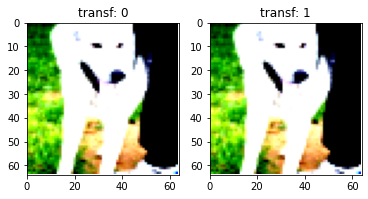

28


In [5]:
# YOUR CODE HERE
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
    #transforms.Normalize(mean=[0.485, 0.456, 0.406],
     #                    std=[0.229, 0.224, 0.225] )
print(device)

TRANSFORM_TRAINIMG = transforms.Compose([
    transforms.Resize(64),    # 96 64 112  224 68   32  
    transforms.CenterCrop(64),  # 96 64 112 224 68   32
    
    #transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=small_train_mean,
                         std =small_train_std )
    ])
TRANSFORM_VALIMG = transforms.Compose([
    transforms.Resize(64),  #224 68   32
    transforms.CenterCrop(64),   #224 68   32
    
    #transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=small_val_std,
                         std =small_val_std )
    ])



# TRANSFORM_IMG2 = transforms.Compose([
#     transforms.Resize(64),
#     transforms.CenterCrop(64),
#     transforms.ToTensor(),
#   #  transforms.Normalize(mean=[0.485, 0.456, 0.406],
#   #                       std=[0.229, 0.224, 0.225])
#     ])


# train_dataset2= ImageFolder( root="small_train", transform=transforms.Compose([transforms.ToTensor()]))
# loader = DataLoader(train_dataset2, batch_size=len(train_dataset2), num_workers=1)
# data = next(iter(loader))
# print(data[0].mean(), data[0].std())

# train_dataset= ImageFolder( root="small_train",transform=TRANSFORM_TRAINIMG )
# dataloader = DataLoader(train_dataset, batch_size=3500, shuffle=False, num_workers=4)
# pop_mean = []
# pop_std0 = []
# pop_std1 = []
# for i, data in enumerate(dataloader, 0):
    # shape (batch_size, 3, height, width)
#     print(i)
#     print(type(data))
#     print(len(data))
#     arr=np.array(data[0])
#     print(arr.shape)
#     print(data[0].shape)
    #print(data.size)
#     numpy_image = data[0].numpy()
    
#     # shape (3,)
#     batch_mean = np.mean(numpy_image, axis=(0,2,3))
#     batch_std0 = np.std(numpy_image, axis=(0,2,3))
#     batch_std1 = np.std(numpy_image, axis=(0,2,3), ddof=1)
    
#     pop_mean.append(batch_mean)
#     pop_std0.append(batch_std0)
#     pop_std1.append(batch_std1)

# print(pop_mean)
# print(pop_std0)
# print(pop_std1)
# shape (num_iterations, 3) -> (mean across 0th axis) -> shape (3,)
#pop_mean = np.array(pop_mean).mean(axis=0)
#pop_std0 = np.array(pop_std0).mean(axis=0)
#pop_std1 = np.array(pop_std1).mean(axis=0)



train_dataset= ImageFolder( root="small_train", transform=TRANSFORM_TRAINIMG )

train_data_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=False, num_workers=4)

val_dataset= ImageFolder( root="small_val", transform=TRANSFORM_VALIMG ) 

val_data_loader = DataLoader(val_dataset, batch_size=256, num_workers=4)

#print(type(dataset_1))
#print(type(data_loader_1))


compare_transforms([train_dataset,train_dataset], 2500)
j=0
for i, (data, labels) in enumerate(train_data_loader):
    j= j+1
print(j)    
   # print(type(data))
   # print(data.shape)
  #  print(labels.shape)


**(2 POE)** How did you select transformations, if any? Briefly explain your reasoning:

**Your answer:** 
1- Resize (transforms.Resize) 
2- CenterCrop (transforms.CenterCrop)
3- Normalize (transforms.Normalize)


---
## 2. Training

**(1 POE)**

Create your first CNN architecture for this task. Start with something as simple as possible, that you're almost sure can get an accuracy better than 50% (we'll improve upon it later).
Naturally, you must also select a loss function and an optimizer.

Hints:

- Training on a CPU is slow and in the beginning you just want to verify that your architecture actually produces a predicition with the correct shape. Make everything you can to speed up the prototyping phase, e.g. train only for a single epoch and make the images ridiculously small.
- Going from the last CNN layer to the final fully connected layer is not trivial. The convolutions produces "3D" output which we can think of as an image with many channels, while the fully connected layer expects a row vector as input. Calculate how many output features the convolutions produce and use `.reshape` to make your tensor fit the fully connected layer. (It is also common to see the `.view` method to do the same thing. They basically do the same thing but have some differences in internal memory management.) *Hint within the hint:* remember that the fully connected layers expects a *batch* of 1D tensors. 


In [ ]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5)
        self.fc1 = nn.Linear(4*4*50, 150)  #4x4x50
        self.fc2 = nn.Linear(150, 2)
       # self.fc3 = nn.Linear(500, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 4*4*50)   #4x4x50
        x = F.relu(self.fc1(x))
      #  x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
        #return x

In [ ]:
print(torch.cuda.is_available())

Train your model using the two data loaders you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Hints:
- Note that you will need to plot your training and validation losses and accuracies, so make sure that you saved them during training. 

In [7]:
# Any pytorch object (e.g. model, inputs, output, etc.) can 
# be transferred to the current device by running
#       name_of_object.to(device)
# Example:
#       model.to(device)
#
# The following line automatically figures out what device (cpu or gpu)
# you are using and stores the result in `device`.
# Later we can use the `.to(device)` method to move our data or model to the correct device.



# YOUR CODE HERE
model = ImageClassifierNetwork()
model.to(device);
#loss_fn = nn.NLLLoss()
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.0001,momentum=0.5)


def evaluate_model(val_data_loader, model, loss_fn):
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_data_loader:
            b_x=b_x.to(device)
            b_y=b_y.to(device)
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy = n_correct/len(val_dataset)
        val_avg_loss = sum(losses)/len(losses)    
    
    return val_accuracy, val_avg_loss



In [ ]:
torch.cuda.empty_cache()

In [8]:
for epoch in range(35):
    losses = []
    n_correct = 0
    for b_x, b_y in train_data_loader:
        b_x=b_x.to(device)
        b_y=b_y.to(device)
        
        # Compute predictions and losses
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        
        losses.append(loss.item())
        
        # Count number of correct predictions
        hard_preds = pred.argmax(dim=1)
        n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()

        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accuracy = n_correct/len(train_dataset)
    train_avg_loss = sum(losses)/len(losses)    
    

    # Compute accuracy and loss in the entire validation set
   
    val_accuracy, val_avg_loss = evaluate_model(val_data_loader, model, loss_fn)
  
    
    
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))

Epoch 0 	Loss: 0.696 	Loss (val): 0.689	Accuracy: 0.50 	Accuracy (val): 0.50
Epoch 1 	Loss: 0.674 	Loss (val): 0.667	Accuracy: 0.58 	Accuracy (val): 0.61
Epoch 2 	Loss: 0.643 	Loss (val): 0.719	Accuracy: 0.63 	Accuracy (val): 0.55
Epoch 3 	Loss: 0.617 	Loss (val): 0.658	Accuracy: 0.66 	Accuracy (val): 0.62
Epoch 4 	Loss: 0.608 	Loss (val): 0.606	Accuracy: 0.67 	Accuracy (val): 0.66
Epoch 5 	Loss: 0.563 	Loss (val): 0.653	Accuracy: 0.71 	Accuracy (val): 0.65
Epoch 6 	Loss: 0.554 	Loss (val): 0.598	Accuracy: 0.72 	Accuracy (val): 0.66
Epoch 7 	Loss: 0.541 	Loss (val): 0.587	Accuracy: 0.72 	Accuracy (val): 0.68
Epoch 8 	Loss: 0.501 	Loss (val): 0.622	Accuracy: 0.74 	Accuracy (val): 0.67
Epoch 9 	Loss: 0.462 	Loss (val): 0.553	Accuracy: 0.78 	Accuracy (val): 0.72
Epoch 10 	Loss: 0.427 	Loss (val): 0.583	Accuracy: 0.80 	Accuracy (val): 0.73
Epoch 11 	Loss: 0.391 	Loss (val): 0.616	Accuracy: 0.82 	Accuracy (val): 0.72
Epoch 12 	Loss: 0.342 	Loss (val): 0.628	Accuracy: 0.85 	Accuracy (val): 0

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

In [ ]:
# YOUR CODE HERE
%matplotlib notebook

# Create figure for plotting
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
plt.ion()
plot_interval = 1


# Create arrays to save all of the metrics throughout training
train_losses = []
val_losses = []
train_accs = []
val_accs = []

# Train the model
for epoch in range(2):
    for i, (b_x, b_y) in enumerate(train_data_loader):
        # Compute predictions and loss
        b_x=b_x.to(device)
        b_y=b_y.to(device)
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
    
        # Back-propagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Compute metrics
        hard_preds = pred.argmax(dim=1)
        n_correct = torch.sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy, val_avg_loss = evaluate_model(val_data_loader, model, loss_fn)
        
        # Save them in the arrays
        train_losses.append(loss.item())
        val_losses.append(val_avg_loss)
        train_accs.append(n_correct/len(b_x))
        val_accs.append(val_accuracy)
        
        if i % plot_interval == 0:
            # Update plots
            ax[0].clear()
            ax[0].plot(train_losses)
            ax[0].plot(val_losses)

            ax[1].clear()
            ax[1].plot(train_accs)
            ax[1].plot(val_accs)

            # Add legends and labels
            ax[0].set_title('Loss')
            ax[0].set_xlabel('Number of batches')
            ax[0].legend(['Train', 'Validation'])

            ax[1].set_title('Accuracy')
            ax[1].set_xlabel('Number of batches')
            ax[1].legend(['Train', 'Validation'])
            ax[1].set_ylim([0,1])

            # Draw the figure on the screen
            fig.canvas.draw()

**(2 POE)** Based on these, what would you suggest for improving your model? Why?

**Your answer:** 
1- Adding more convolutional layer
2- using smaller filters   deeper, more non-linearities and fewer parameters 
3- increase size of input image

---
## 3. Improving your model

**(1 POE)** Continue to improve your model architecture by comparing the value of the metrics you're interested in for both the training and validation set. Try different ideas! When you're happy with one architecture, copy it in the cell below and train it here. Save the training and validation losses and accuracies. You'll use this later to compare your best model with the one using transfer learning.

**Note**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to Canvas, the cell below must contain only the definition and training of *one* model. Remove all code related to the models that were not chosen.

In [ ]:
#input 96x96x3
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
       # self.conv7 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        
        
      #  self.conv8 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
     #   self.conv9 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
#         self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        
#         self.conv11 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
     #   self.conv10_drop = nn.Dropout2d()
    
        self.fc1 = nn.Linear(12*12*256, 2)
    #    self.fc2 = nn.Linear(150, 2)
#         self.fc3 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #48  #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #24 #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
      #  x = F.relu(self.conv7(x))     
        x = F.max_pool2d(x, kernel_size=2) #12 #14   #8
        
#         x = F.relu(self.conv11(x)) 
#         x = F.max_pool2d(x, kernel_size=2) #14   #4
        
      #  x = F.relu(self.conv8(x))   
     #   x = F.relu(self.conv9(x))   
#         x = F.relu(self.conv10(x)) 
#         x = F.relu(self.conv10_drop(x))
      #  x = F.max_pool2d(x, kernel_size=2) #6    #[14x14x512] if i=224x224    7x7x512 if i=112
        
   #     x = F.relu(self.conv11(x))
   #     x = F.max_pool2d(x, kernel_size=2) #[7x7x512]
        
        
        
        
        x = x.view(-1, 12*12*256)
      #  x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
       # x = F.dropout(x, training=self.training)
        x = self.fc1(x)
     #   return F.softmax(x, dim=1)
        return x
    
# Epoch 0 	Loss: 0.699 	Loss (val): 0.693	Accuracy: 0.51 	Accuracy (val): 0.50
# Epoch 1 	Loss: 0.684 	Loss (val): 0.672	Accuracy: 0.55 	Accuracy (val): 0.56
# Epoch 2 	Loss: 0.651 	Loss (val): 0.652	Accuracy: 0.62 	Accuracy (val): 0.62
# Epoch 3 	Loss: 0.609 	Loss (val): 0.641	Accuracy: 0.67 	Accuracy (val): 0.63
# Epoch 4 	Loss: 0.604 	Loss (val): 0.638	Accuracy: 0.67 	Accuracy (val): 0.62
# Epoch 5 	Loss: 0.589 	Loss (val): 0.617	Accuracy: 0.69 	Accuracy (val): 0.66
# Epoch 6 	Loss: 0.568 	Loss (val): 0.639	Accuracy: 0.71 	Accuracy (val): 0.65
# Epoch 7 	Loss: 0.548 	Loss (val): 0.691	Accuracy: 0.73 	Accuracy (val): 0.64
# Epoch 8 	Loss: 0.521 	Loss (val): 0.623	Accuracy: 0.74 	Accuracy (val): 0.67
# Epoch 9 	Loss: 0.498 	Loss (val): 0.592	Accuracy: 0.76 	Accuracy (val): 0.71
# Epoch 10 	Loss: 0.470 	Loss (val): 0.577	Accuracy: 0.77 	Accuracy (val): 0.71
# Epoch 11 	Loss: 0.437 	Loss (val): 0.578	Accuracy: 0.79 	Accuracy (val): 0.71
# Epoch 12 	Loss: 0.377 	Loss (val): 0.665	Accuracy: 0.83 	Accuracy (val): 0.71
# Epoch 13 	Loss: 0.370 	Loss (val): 0.640	Accuracy: 0.83 	Accuracy (val): 0.71
# Epoch 14 	Loss: 0.289 	Loss (val): 0.631	Accuracy: 0.88 	Accuracy (val): 0.75
# Epoch 15 	Loss: 0.267 	Loss (val): 0.723	Accuracy: 0.89 	Accuracy (val): 0.72
# Epoch 16 	Loss: 0.193 	Loss (val): 0.767	Accuracy: 0.92 	Accuracy (val): 0.74
# Epoch 17 	Loss: 0.138 	Loss (val): 0.934	Accuracy: 0.95 	Accuracy (val): 0.75
# Epoch 18 	Loss: 0.116 	Loss (val): 0.964	Accuracy: 0.96 	Accuracy (val): 0.75
# Epoch 19 	Loss: 0.068 	Loss (val): 1.231	Accuracy: 0.98 	Accuracy (val): 0.74
# Epoch 20 	Loss: 0.052 	Loss (val): 1.523	Accuracy: 0.98 	Accuracy (val): 0.74
# Epoch 21 	Loss: 0.081 	Loss (val): 1.382	Accuracy: 0.97 	Accuracy (val): 0.73
# Epoch 22 	Loss: 0.051 	Loss (val): 1.633	Accuracy: 0.98 	Accuracy (val): 0.74
# Epoch 23 	Loss: 0.035 	Loss (val): 1.534	Accuracy: 0.99 	Accuracy (val): 0.73
# Epoch 24 	Loss: 0.024 	Loss (val): 1.875	Accuracy: 0.99 	Accuracy (val): 0.74
# Epoch 25 	Loss: 0.014 	Loss (val): 1.821	Accuracy: 1.00 	Accuracy (val): 0.73
# Epoch 26 	Loss: 0.006 	Loss (val): 2.076	Accuracy: 1.00 	Accuracy (val): 0.73
# Epoch 27 	Loss: 0.003 	Loss (val): 2.032	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 28 	Loss: 0.001 	Loss (val): 2.245	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 29 	Loss: 0.001 	Loss (val): 2.193	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 30 	Loss: 0.000 	Loss (val): 2.252	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 31 	Loss: 0.000 	Loss (val): 2.297	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 32 	Loss: 0.000 	Loss (val): 2.337	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 33 	Loss: 0.000 	Loss (val): 2.370	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 34 	Loss: 0.000 	Loss (val): 2.401	Accuracy: 1.00 	Accuracy (val): 0.74

In [ ]:
#input 96x96x3
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
       # self.conv7 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        
        
        self.conv8 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        self.conv9 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
#         self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        
#         self.conv11 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
     #   self.conv10_drop = nn.Dropout2d()
    
        self.fc1 = nn.Linear(6*6*256, 2)
    #    self.fc2 = nn.Linear(150, 2)
#         self.fc3 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #48  #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #24 #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
      #  x = F.relu(self.conv7(x))     
        x = F.max_pool2d(x, kernel_size=2) #12 #14   #8
        
#         x = F.relu(self.conv11(x)) 
#         x = F.max_pool2d(x, kernel_size=2) #14   #4
        
        x = F.relu(self.conv8(x))   
        x = F.relu(self.conv9(x))   
#         x = F.relu(self.conv10(x)) 
#         x = F.relu(self.conv10_drop(x))
        x = F.max_pool2d(x, kernel_size=2) #6    #[14x14x512] if i=224x224    7x7x512 if i=112
        
   #     x = F.relu(self.conv11(x))
   #     x = F.max_pool2d(x, kernel_size=2) #[7x7x512]
        
        
        
        
        x = x.view(-1, 6*6*256)
      #  x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
       # x = F.dropout(x, training=self.training)
        x = self.fc1(x)
     #   return F.softmax(x, dim=1)
        return x
# Epoch 0 	Loss: 0.696 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 1 	Loss: 0.693 	Loss (val): 0.691	Accuracy: 0.51 	Accuracy (val): 0.51
# Epoch 2 	Loss: 0.687 	Loss (val): 0.693	Accuracy: 0.56 	Accuracy (val): 0.50
# Epoch 3 	Loss: 0.683 	Loss (val): 0.712	Accuracy: 0.54 	Accuracy (val): 0.55
# Epoch 4 	Loss: 0.671 	Loss (val): 0.677	Accuracy: 0.60 	Accuracy (val): 0.60
# Epoch 5 	Loss: 0.669 	Loss (val): 0.715	Accuracy: 0.60 	Accuracy (val): 0.59
# Epoch 6 	Loss: 0.645 	Loss (val): 0.705	Accuracy: 0.63 	Accuracy (val): 0.58
# Epoch 7 	Loss: 0.619 	Loss (val): 0.676	Accuracy: 0.66 	Accuracy (val): 0.61
# Epoch 8 	Loss: 0.607 	Loss (val): 0.622	Accuracy: 0.67 	Accuracy (val): 0.64
# Epoch 9 	Loss: 0.582 	Loss (val): 0.659	Accuracy: 0.70 	Accuracy (val): 0.63
# Epoch 10 	Loss: 0.590 	Loss (val): 0.632	Accuracy: 0.69 	Accuracy (val): 0.65
# Epoch 11 	Loss: 0.566 	Loss (val): 0.623	Accuracy: 0.72 	Accuracy (val): 0.65
# Epoch 12 	Loss: 0.562 	Loss (val): 0.613	Accuracy: 0.72 	Accuracy (val): 0.68
# Epoch 13 	Loss: 0.552 	Loss (val): 0.708	Accuracy: 0.73 	Accuracy (val): 0.60
# Epoch 14 	Loss: 0.537 	Loss (val): 0.578	Accuracy: 0.74 	Accuracy (val): 0.69
# Epoch 15 	Loss: 0.514 	Loss (val): 0.588	Accuracy: 0.74 	Accuracy (val): 0.70
# Epoch 16 	Loss: 0.501 	Loss (val): 0.588	Accuracy: 0.76 	Accuracy (val): 0.69
# Epoch 17 	Loss: 0.477 	Loss (val): 0.607	Accuracy: 0.78 	Accuracy (val): 0.70
# Epoch 18 	Loss: 0.468 	Loss (val): 0.697	Accuracy: 0.78 	Accuracy (val): 0.67
# Epoch 19 	Loss: 0.447 	Loss (val): 0.598	Accuracy: 0.79 	Accuracy (val): 0.70
# Epoch 20 	Loss: 0.395 	Loss (val): 0.588	Accuracy: 0.83 	Accuracy (val): 0.71
# Epoch 21 	Loss: 0.374 	Loss (val): 0.614	Accuracy: 0.84 	Accuracy (val): 0.71
# Epoch 22 	Loss: 0.328 	Loss (val): 0.662	Accuracy: 0.86 	Accuracy (val): 0.72
# Epoch 23 	Loss: 0.290 	Loss (val): 0.688	Accuracy: 0.88 	Accuracy (val): 0.73
# Epoch 24 	Loss: 0.234 	Loss (val): 0.693	Accuracy: 0.90 	Accuracy (val): 0.75
# Epoch 25 	Loss: 0.234 	Loss (val): 0.762	Accuracy: 0.91 	Accuracy (val): 0.73
# Epoch 26 	Loss: 0.166 	Loss (val): 0.945	Accuracy: 0.93 	Accuracy (val): 0.73
# Epoch 27 	Loss: 0.125 	Loss (val): 1.202	Accuracy: 0.96 	Accuracy (val): 0.72
# Epoch 28 	Loss: 0.141 	Loss (val): 0.968	Accuracy: 0.94 	Accuracy (val): 0.72
# Epoch 29 	Loss: 0.088 	Loss (val): 1.162	Accuracy: 0.97 	Accuracy (val): 0.73
# Epoch 0 	Loss: 0.042 	Loss (val): 1.622	Accuracy: 0.99 	Accuracy (val): 0.73
# Epoch 1 	Loss: 0.058 	Loss (val): 1.725	Accuracy: 0.98 	Accuracy (val): 0.72
# Epoch 2 	Loss: 0.079 	Loss (val): 1.250	Accuracy: 0.98 	Accuracy (val): 0.74
# Epoch 3 	Loss: 0.031 	Loss (val): 1.508	Accuracy: 0.99 	Accuracy (val): 0.74
# Epoch 4 	Loss: 0.019 	Loss (val): 1.837	Accuracy: 0.99 	Accuracy (val): 0.75
# Epoch 5 	Loss: 0.016 	Loss (val): 1.502	Accuracy: 1.00 	Accuracy (val): 0.75
# Epoch 6 	Loss: 0.010 	Loss (val): 1.917	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 7 	Loss: 0.012 	Loss (val): 2.114	Accuracy: 1.00 	Accuracy (val): 0.73
# Epoch 8 	Loss: 0.023 	Loss (val): 1.930	Accuracy: 0.99 	Accuracy (val): 0.74
# Epoch 9 	Loss: 0.026 	Loss (val): 1.862	Accuracy: 0.99 	Accuracy (val): 0.73
# Epoch 10 	Loss: 0.014 	Loss (val): 2.444	Accuracy: 0.99 	Accuracy (val): 0.72
# Epoch 11 	Loss: 0.023 	Loss (val): 2.080	Accuracy: 0.99 	Accuracy (val): 0.72
# Epoch 12 	Loss: 0.019 	Loss (val): 1.901	Accuracy: 0.99 	Accuracy (val): 0.73


In [ ]:
# YOUR CODE HERE
#input 64x64x3
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
       # self.conv7 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        
        
        self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3,padding=1)
        self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
#         self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        
#         self.conv11 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
     #   self.conv10_drop = nn.Dropout2d()
    
        self.fc1 = nn.Linear(4*4*512, 2)
    #    self.fc2 = nn.Linear(150, 2)
#         self.fc3 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
      #  x = F.relu(self.conv7(x))     
        x = F.max_pool2d(x, kernel_size=2) #14   #8
        
#         x = F.relu(self.conv11(x)) 
#         x = F.max_pool2d(x, kernel_size=2) #14   #4
        
        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))

#         x = F.relu(self.conv10(x)) 
#         x = F.relu(self.conv10_drop(x))
        x = F.max_pool2d(x, kernel_size=2) #4    #[14x14x512] if i=224x224    7x7x512 if i=112
        
   #     x = F.relu(self.conv11(x))
   #     x = F.max_pool2d(x, kernel_size=2) #[7x7x512]
        
        
        
        
        x = x.view(-1, 4*4*512)
      #  x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
       # x = F.dropout(x, training=self.training)
        x = self.fc1(x)
     #   return F.softmax(x, dim=1)
        return x
# Epoch 0 	Loss: 0.695 	Loss (val): 0.693	Accuracy: 0.49 	Accuracy (val): 0.50
# Epoch 1 	Loss: 0.693 	Loss (val): 0.692	Accuracy: 0.51 	Accuracy (val): 0.50
# Epoch 2 	Loss: 0.680 	Loss (val): 0.686	Accuracy: 0.57 	Accuracy (val): 0.57
# Epoch 3 	Loss: 0.661 	Loss (val): 0.661	Accuracy: 0.60 	Accuracy (val): 0.61
# Epoch 4 	Loss: 0.621 	Loss (val): 0.634	Accuracy: 0.65 	Accuracy (val): 0.65
# Epoch 5 	Loss: 0.588 	Loss (val): 0.620	Accuracy: 0.69 	Accuracy (val): 0.64
# Epoch 6 	Loss: 0.586 	Loss (val): 0.602	Accuracy: 0.69 	Accuracy (val): 0.67
# Epoch 7 	Loss: 0.576 	Loss (val): 0.609	Accuracy: 0.70 	Accuracy (val): 0.67
# Epoch 8 	Loss: 0.567 	Loss (val): 0.674	Accuracy: 0.71 	Accuracy (val): 0.63
# Epoch 9 	Loss: 0.552 	Loss (val): 0.651	Accuracy: 0.72 	Accuracy (val): 0.64
# Epoch 10 	Loss: 0.552 	Loss (val): 0.589	Accuracy: 0.72 	Accuracy (val): 0.67
# Epoch 11 	Loss: 0.517 	Loss (val): 0.555	Accuracy: 0.75 	Accuracy (val): 0.71
# Epoch 12 	Loss: 0.501 	Loss (val): 0.567	Accuracy: 0.76 	Accuracy (val): 0.69
# Epoch 13 	Loss: 0.486 	Loss (val): 0.568	Accuracy: 0.77 	Accuracy (val): 0.70
# Epoch 14 	Loss: 0.482 	Loss (val): 0.566	Accuracy: 0.77 	Accuracy (val): 0.72
# Epoch 15 	Loss: 0.456 	Loss (val): 0.642	Accuracy: 0.79 	Accuracy (val): 0.66
# Epoch 16 	Loss: 0.438 	Loss (val): 0.540	Accuracy: 0.80 	Accuracy (val): 0.75
# Epoch 17 	Loss: 0.415 	Loss (val): 0.729	Accuracy: 0.82 	Accuracy (val): 0.67
# Epoch 18 	Loss: 0.395 	Loss (val): 0.596	Accuracy: 0.82 	Accuracy (val): 0.73
# Epoch 19 	Loss: 0.352 	Loss (val): 0.599	Accuracy: 0.84 	Accuracy (val): 0.74
# Epoch 20 	Loss: 0.301 	Loss (val): 0.640	Accuracy: 0.87 	Accuracy (val): 0.74
# Epoch 21 	Loss: 0.263 	Loss (val): 0.641	Accuracy: 0.89 	Accuracy (val): 0.74
# Epoch 22 	Loss: 0.232 	Loss (val): 0.664	Accuracy: 0.91 	Accuracy (val): 0.72
# Epoch 23 	Loss: 0.183 	Loss (val): 0.837	Accuracy: 0.93 	Accuracy (val): 0.73
# Epoch 24 	Loss: 0.151 	Loss (val): 1.007	Accuracy: 0.94 	Accuracy (val): 0.72
# Epoch 25 	Loss: 0.119 	Loss (val): 0.848	Accuracy: 0.95 	Accuracy (val): 0.73
# Epoch 26 	Loss: 0.118 	Loss (val): 1.137	Accuracy: 0.96 	Accuracy (val): 0.71
# Epoch 27 	Loss: 0.136 	Loss (val): 0.846	Accuracy: 0.95 	Accuracy (val): 0.76
# Epoch 28 	Loss: 0.064 	Loss (val): 1.060	Accuracy: 0.98 	Accuracy (val): 0.75
# Epoch 29 	Loss: 0.077 	Loss (val): 1.059	Accuracy: 0.97 	Accuracy (val): 0.75
# Epoch 30 	Loss: 0.076 	Loss (val): 1.046	Accuracy: 0.97 	Accuracy (val): 0.76
# Epoch 31 	Loss: 0.028 	Loss (val): 1.489	Accuracy: 0.99 	Accuracy (val): 0.75
# Epoch 32 	Loss: 0.030 	Loss (val): 1.515	Accuracy: 0.99 	Accuracy (val): 0.76
# Epoch 33 	Loss: 0.048 	Loss (val): 1.334	Accuracy: 0.98 	Accuracy (val): 0.74
# Epoch 34 	Loss: 0.039 	Loss (val): 1.377	Accuracy: 0.99 	Accuracy (val): 0.75    

In [ ]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,padding=1)
        #self.norm1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,padding=1)
       # self.norm2 = nn.BatchNorm2d(64)
        #
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,padding=1)
     #   self.norm3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
     #   self.norm4 = nn.BatchNorm2d(128)
        #
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
      #  self.norm5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
      #  self.norm6 = nn.BatchNorm2d(256)

        
        self.fc1 = nn.Linear(8*8*128, 2)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x)) 
        x = F.max_pool2d(x, kernel_size=2) #14   #8      
        
        x = x.view(-1, 8*8*128)
        x = self.fc1(x)

        return x
# Epoch 0 	Loss: 0.695 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 1 	Loss: 0.692 	Loss (val): 0.690	Accuracy: 0.52 	Accuracy (val): 0.55
# Epoch 2 	Loss: 0.675 	Loss (val): 0.669	Accuracy: 0.59 	Accuracy (val): 0.59
# Epoch 3 	Loss: 0.660 	Loss (val): 0.666	Accuracy: 0.60 	Accuracy (val): 0.59
# Epoch 4 	Loss: 0.632 	Loss (val): 0.638	Accuracy: 0.65 	Accuracy (val): 0.63
# Epoch 5 	Loss: 0.606 	Loss (val): 0.672	Accuracy: 0.68 	Accuracy (val): 0.64
# Epoch 6 	Loss: 0.591 	Loss (val): 0.644	Accuracy: 0.69 	Accuracy (val): 0.64
# Epoch 7 	Loss: 0.562 	Loss (val): 0.603	Accuracy: 0.72 	Accuracy (val): 0.68
# Epoch 8 	Loss: 0.529 	Loss (val): 0.590	Accuracy: 0.74 	Accuracy (val): 0.68
# Epoch 9 	Loss: 0.500 	Loss (val): 0.592	Accuracy: 0.75 	Accuracy (val): 0.71
# Epoch 10 	Loss: 0.477 	Loss (val): 0.696	Accuracy: 0.78 	Accuracy (val): 0.67
# Epoch 11 	Loss: 0.468 	Loss (val): 0.621	Accuracy: 0.78 	Accuracy (val): 0.69
# Epoch 12 	Loss: 0.435 	Loss (val): 0.717	Accuracy: 0.80 	Accuracy (val): 0.67
# Epoch 13 	Loss: 0.415 	Loss (val): 0.637	Accuracy: 0.81 	Accuracy (val): 0.71
# Epoch 14 	Loss: 0.365 	Loss (val): 0.783	Accuracy: 0.84 	Accuracy (val): 0.68
# Epoch 15 	Loss: 0.345 	Loss (val): 0.595	Accuracy: 0.85 	Accuracy (val): 0.72
# Epoch 16 	Loss: 0.304 	Loss (val): 0.647	Accuracy: 0.87 	Accuracy (val): 0.72
# Epoch 17 	Loss: 0.255 	Loss (val): 0.686	Accuracy: 0.89 	Accuracy (val): 0.73
# Epoch 18 	Loss: 0.205 	Loss (val): 0.945	Accuracy: 0.92 	Accuracy (val): 0.70
# Epoch 19 	Loss: 0.168 	Loss (val): 1.145	Accuracy: 0.93 	Accuracy (val): 0.69
# Epoch 20 	Loss: 0.129 	Loss (val): 1.066	Accuracy: 0.95 	Accuracy (val): 0.72
# Epoch 21 	Loss: 0.099 	Loss (val): 1.116	Accuracy: 0.96 	Accuracy (val): 0.73
# Epoch 22 	Loss: 0.066 	Loss (val): 1.359	Accuracy: 0.98 	Accuracy (val): 0.72
# Epoch 23 	Loss: 0.066 	Loss (val): 1.548	Accuracy: 0.98 	Accuracy (val): 0.69
# Epoch 24 	Loss: 0.057 	Loss (val): 1.439	Accuracy: 0.98 	Accuracy (val): 0.72
# Epoch 25 	Loss: 0.048 	Loss (val): 1.737	Accuracy: 0.99 	Accuracy (val): 0.71
# Epoch 26 	Loss: 0.023 	Loss (val): 1.744	Accuracy: 0.99 	Accuracy (val): 0.73
# Epoch 27 	Loss: 0.013 	Loss (val): 2.089	Accuracy: 1.00 	Accuracy (val): 0.71
# Epoch 28 	Loss: 0.007 	Loss (val): 2.135	Accuracy: 1.00 	Accuracy (val): 0.71
# Epoch 29 	Loss: 0.003 	Loss (val): 2.221	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 30 	Loss: 0.001 	Loss (val): 2.326	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 31 	Loss: 0.001 	Loss (val): 2.452	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 32 	Loss: 0.000 	Loss (val): 2.496	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 33 	Loss: 0.000 	Loss (val): 2.528	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 34 	Loss: 0.000 	Loss (val): 2.606	Accuracy: 1.00 	Accuracy (val): 0.72

In [ ]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        #self.norm1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
       # self.norm2 = nn.BatchNorm2d(64)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
     #   self.norm3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
     #   self.norm4 = nn.BatchNorm2d(128)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
      #  self.norm5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3,padding=1)
      #  self.norm6 = nn.BatchNorm2d(256)

        
        self.fc1 = nn.Linear(8*8*512, 2)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x)) 
        x = F.max_pool2d(x, kernel_size=2) #14   #8
        

        
        
        
        x = x.view(-1, 8*8*512)
        x = self.fc1(x)

        return x
    
# Epoch 0 	Loss: 0.696 	Loss (val): 0.693	Accuracy: 0.51 	Accuracy (val): 0.49
# Epoch 1 	Loss: 0.681 	Loss (val): 0.678	Accuracy: 0.57 	Accuracy (val): 0.56
# Epoch 2 	Loss: 0.652 	Loss (val): 0.697	Accuracy: 0.62 	Accuracy (val): 0.57
# Epoch 3 	Loss: 0.613 	Loss (val): 0.657	Accuracy: 0.68 	Accuracy (val): 0.60
# Epoch 4 	Loss: 0.575 	Loss (val): 0.655	Accuracy: 0.71 	Accuracy (val): 0.62
# Epoch 5 	Loss: 0.544 	Loss (val): 0.709	Accuracy: 0.73 	Accuracy (val): 0.64
# Epoch 6 	Loss: 0.515 	Loss (val): 0.638	Accuracy: 0.75 	Accuracy (val): 0.68
# Epoch 7 	Loss: 0.541 	Loss (val): 0.606	Accuracy: 0.73 	Accuracy (val): 0.68
# Epoch 8 	Loss: 0.473 	Loss (val): 0.627	Accuracy: 0.77 	Accuracy (val): 0.68
# Epoch 9 	Loss: 0.438 	Loss (val): 0.586	Accuracy: 0.80 	Accuracy (val): 0.70
# Epoch 10 	Loss: 0.398 	Loss (val): 0.612	Accuracy: 0.82 	Accuracy (val): 0.71
# Epoch 11 	Loss: 0.382 	Loss (val): 0.601	Accuracy: 0.83 	Accuracy (val): 0.73
# Epoch 12 	Loss: 0.329 	Loss (val): 0.593	Accuracy: 0.86 	Accuracy (val): 0.75
# Epoch 13 	Loss: 0.297 	Loss (val): 0.581	Accuracy: 0.88 	Accuracy (val): 0.75
# Epoch 14 	Loss: 0.249 	Loss (val): 0.764	Accuracy: 0.90 	Accuracy (val): 0.68
# Epoch 15 	Loss: 0.213 	Loss (val): 0.640	Accuracy: 0.92 	Accuracy (val): 0.75
# Epoch 16 	Loss: 0.149 	Loss (val): 0.810	Accuracy: 0.94 	Accuracy (val): 0.74
# Epoch 17 	Loss: 0.107 	Loss (val): 1.156	Accuracy: 0.96 	Accuracy (val): 0.70
# Epoch 18 	Loss: 0.114 	Loss (val): 1.125	Accuracy: 0.96 	Accuracy (val): 0.70
# Epoch 19 	Loss: 0.060 	Loss (val): 1.356	Accuracy: 0.98 	Accuracy (val): 0.71
# Epoch 20 	Loss: 0.041 	Loss (val): 1.170	Accuracy: 0.99 	Accuracy (val): 0.74
# Epoch 21 	Loss: 0.030 	Loss (val): 1.506	Accuracy: 0.99 	Accuracy (val): 0.73
# Epoch 22 	Loss: 0.025 	Loss (val): 1.352	Accuracy: 0.99 	Accuracy (val): 0.75
# Epoch 23 	Loss: 0.040 	Loss (val): 1.683	Accuracy: 0.99 	Accuracy (val): 0.69
# Epoch 24 	Loss: 0.024 	Loss (val): 1.598	Accuracy: 0.99 	Accuracy (val): 0.71
# Epoch 25 	Loss: 0.011 	Loss (val): 1.861	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 26 	Loss: 0.007 	Loss (val): 1.989	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 27 	Loss: 0.002 	Loss (val): 2.087	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 28 	Loss: 0.001 	Loss (val): 2.098	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 29 	Loss: 0.000 	Loss (val): 2.190	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 30 	Loss: 0.000 	Loss (val): 2.216	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 31 	Loss: 0.000 	Loss (val): 2.305	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 32 	Loss: 0.000 	Loss (val): 2.420	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 33 	Loss: 0.000 	Loss (val): 2.440	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 34 	Loss: 0.000 	Loss (val): 2.519	Accuracy: 1.00 	Accuracy (val): 0.72

In [ ]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.norm1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        self.norm2 = nn.BatchNorm2d(64)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.norm3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        self.norm4 = nn.BatchNorm2d(128)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.norm5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        self.norm6 = nn.BatchNorm2d(256)

        
        self.fc1 = nn.Linear(8*8*256, 2)
    
    def forward(self, x):
        x = F.relu(self.norm1(self.conv1(x)))
        x = F.relu(self.norm2(self.conv2(x)))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.norm3(self.conv3(x)))
        x = F.relu(self.norm4(self.conv4(x)))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.norm5(self.conv5(x)))
        x = F.relu(self.norm6(self.conv6(x))) 
        x = F.max_pool2d(x, kernel_size=2) #14   #8
        

        
        
        
        x = x.view(-1, 8*8*256)
        x = self.fc1(x)

        return x
# Epoch 0 	Loss: 1.352 	Loss (val): 0.795	Accuracy: 0.55 	Accuracy (val): 0.58
# Epoch 1 	Loss: 0.947 	Loss (val): 0.826	Accuracy: 0.60 	Accuracy (val): 0.57
# Epoch 2 	Loss: 0.877 	Loss (val): 0.868	Accuracy: 0.60 	Accuracy (val): 0.56
# Epoch 3 	Loss: 0.708 	Loss (val): 0.829	Accuracy: 0.66 	Accuracy (val): 0.57
# Epoch 4 	Loss: 0.737 	Loss (val): 0.802	Accuracy: 0.69 	Accuracy (val): 0.61
# Epoch 5 	Loss: 0.599 	Loss (val): 0.711	Accuracy: 0.70 	Accuracy (val): 0.62
# Epoch 6 	Loss: 0.600 	Loss (val): 0.864	Accuracy: 0.73 	Accuracy (val): 0.59
# Epoch 7 	Loss: 0.616 	Loss (val): 0.823	Accuracy: 0.71 	Accuracy (val): 0.62
# Epoch 8 	Loss: 0.562 	Loss (val): 0.716	Accuracy: 0.75 	Accuracy (val): 0.63
# Epoch 9 	Loss: 0.534 	Loss (val): 0.738	Accuracy: 0.75 	Accuracy (val): 0.64
# Epoch 10 	Loss: 0.497 	Loss (val): 0.743	Accuracy: 0.77 	Accuracy (val): 0.64
# Epoch 11 	Loss: 0.474 	Loss (val): 0.672	Accuracy: 0.79 	Accuracy (val): 0.67
# Epoch 12 	Loss: 0.460 	Loss (val): 0.719	Accuracy: 0.79 	Accuracy (val): 0.64
# Epoch 13 	Loss: 0.423 	Loss (val): 0.739	Accuracy: 0.81 	Accuracy (val): 0.66
# Epoch 14 	Loss: 0.364 	Loss (val): 0.794	Accuracy: 0.83 	Accuracy (val): 0.66
# Epoch 15 	Loss: 0.375 	Loss (val): 0.708	Accuracy: 0.84 	Accuracy (val): 0.68
# Epoch 16 	Loss: 0.319 	Loss (val): 0.888	Accuracy: 0.86 	Accuracy (val): 0.65
# Epoch 17 	Loss: 0.354 	Loss (val): 0.776	Accuracy: 0.84 	Accuracy (val): 0.67
# Epoch 18 	Loss: 0.333 	Loss (val): 0.926	Accuracy: 0.86 	Accuracy (val): 0.67
# Epoch 19 	Loss: 0.303 	Loss (val): 0.798	Accuracy: 0.88 	Accuracy (val): 0.70
# Epoch 20 	Loss: 0.258 	Loss (val): 0.878	Accuracy: 0.88 	Accuracy (val): 0.68
# Epoch 21 	Loss: 0.243 	Loss (val): 0.851	Accuracy: 0.90 	Accuracy (val): 0.69
# Epoch 22 	Loss: 0.273 	Loss (val): 1.079	Accuracy: 0.88 	Accuracy (val): 0.66
# Epoch 23 	Loss: 0.183 	Loss (val): 1.087	Accuracy: 0.92 	Accuracy (val): 0.68
# Epoch 24 	Loss: 0.140 	Loss (val): 1.125	Accuracy: 0.94 	Accuracy (val): 0.67
# Epoch 25 	Loss: 0.150 	Loss (val): 1.232	Accuracy: 0.94 	Accuracy (val): 0.68
# Epoch 26 	Loss: 0.147 	Loss (val): 1.141	Accuracy: 0.94 	Accuracy (val): 0.68
# Epoch 27 	Loss: 0.113 	Loss (val): 1.408	Accuracy: 0.96 	Accuracy (val): 0.67
# Epoch 28 	Loss: 0.115 	Loss (val): 1.166	Accuracy: 0.95 	Accuracy (val): 0.70
# Epoch 29 	Loss: 0.057 	Loss (val): 1.392	Accuracy: 0.98 	Accuracy (val): 0.69
# Epoch 30 	Loss: 0.042 	Loss (val): 1.301	Accuracy: 0.99 	Accuracy (val): 0.69
# Epoch 31 	Loss: 0.030 	Loss (val): 1.433	Accuracy: 0.99 	Accuracy (val): 0.71
# Epoch 32 	Loss: 0.029 	Loss (val): 1.520	Accuracy: 0.99 	Accuracy (val): 0.70
# Epoch 33 	Loss: 0.032 	Loss (val): 1.414	Accuracy: 0.99 	Accuracy (val): 0.70
# Epoch 34 	Loss: 0.029 	Loss (val): 1.432	Accuracy: 0.99 	Accuracy (val): 0.69

In [ ]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        
        self.fc1 = nn.Linear(8*8*256, 150)
        self.fc2 = nn.Linear(150, 2)
      #  self.fc3 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))     
        x = F.max_pool2d(x, kernel_size=2) #14   #8
        
       
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
       # x = F.relu(self.fc2(x))
      #  x = F.dropout(x, training=self.training)
        x = self.fc2(x)
     #   return F.softmax(x, dim=1)
        return x
    
# Epoch 0 	Loss: 0.695 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 1 	Loss: 0.693 	Loss (val): 0.691	Accuracy: 0.51 	Accuracy (val): 0.52
# Epoch 2 	Loss: 0.691 	Loss (val): 0.690	Accuracy: 0.54 	Accuracy (val): 0.54
# Epoch 3 	Loss: 0.676 	Loss (val): 0.682	Accuracy: 0.58 	Accuracy (val): 0.56
# Epoch 4 	Loss: 0.645 	Loss (val): 0.664	Accuracy: 0.62 	Accuracy (val): 0.58
# Epoch 5 	Loss: 0.614 	Loss (val): 0.635	Accuracy: 0.66 	Accuracy (val): 0.63
# Epoch 6 	Loss: 0.610 	Loss (val): 0.631	Accuracy: 0.68 	Accuracy (val): 0.63
# Epoch 7 	Loss: 0.561 	Loss (val): 0.626	Accuracy: 0.71 	Accuracy (val): 0.66
# Epoch 8 	Loss: 0.531 	Loss (val): 0.605	Accuracy: 0.73 	Accuracy (val): 0.68
# Epoch 9 	Loss: 0.493 	Loss (val): 0.604	Accuracy: 0.76 	Accuracy (val): 0.69
# Epoch 10 	Loss: 0.484 	Loss (val): 0.582	Accuracy: 0.77 	Accuracy (val): 0.70
# Epoch 11 	Loss: 0.427 	Loss (val): 0.665	Accuracy: 0.81 	Accuracy (val): 0.70
# Epoch 12 	Loss: 0.397 	Loss (val): 0.579	Accuracy: 0.81 	Accuracy (val): 0.72
# Epoch 13 	Loss: 0.337 	Loss (val): 0.591	Accuracy: 0.85 	Accuracy (val): 0.72
# Epoch 14 	Loss: 0.314 	Loss (val): 0.620	Accuracy: 0.86 	Accuracy (val): 0.70
# Epoch 15 	Loss: 0.265 	Loss (val): 0.655	Accuracy: 0.89 	Accuracy (val): 0.71
# Epoch 16 	Loss: 0.226 	Loss (val): 0.815	Accuracy: 0.91 	Accuracy (val): 0.73
# Epoch 17 	Loss: 0.185 	Loss (val): 0.935	Accuracy: 0.92 	Accuracy (val): 0.73
# Epoch 18 	Loss: 0.132 	Loss (val): 1.121	Accuracy: 0.95 	Accuracy (val): 0.70
# Epoch 19 	Loss: 0.136 	Loss (val): 1.048	Accuracy: 0.95 	Accuracy (val): 0.72
# Epoch 20 	Loss: 0.066 	Loss (val): 1.563	Accuracy: 0.98 	Accuracy (val): 0.71
# Epoch 21 	Loss: 0.093 	Loss (val): 1.456	Accuracy: 0.97 	Accuracy (val): 0.71
# Epoch 22 	Loss: 0.077 	Loss (val): 1.791	Accuracy: 0.97 	Accuracy (val): 0.68
# Epoch 23 	Loss: 0.070 	Loss (val): 1.805	Accuracy: 0.98 	Accuracy (val): 0.70
# Epoch 24 	Loss: 0.028 	Loss (val): 2.163	Accuracy: 0.99 	Accuracy (val): 0.72
# Epoch 25 	Loss: 0.035 	Loss (val): 1.731	Accuracy: 0.99 	Accuracy (val): 0.72
# Epoch 26 	Loss: 0.042 	Loss (val): 1.908	Accuracy: 0.98 	Accuracy (val): 0.71
# Epoch 27 	Loss: 0.038 	Loss (val): 1.878	Accuracy: 0.99 	Accuracy (val): 0.71
# Epoch 28 	Loss: 0.025 	Loss (val): 1.846	Accuracy: 0.99 	Accuracy (val): 0.73
# Epoch 29 	Loss: 0.010 	Loss (val): 2.827	Accuracy: 1.00 	Accuracy (val): 0.72
# Epoch 30 	Loss: 0.026 	Loss (val): 3.072	Accuracy: 0.99 	Accuracy (val): 0.69
# Epoch 31 	Loss: 0.043 	Loss (val): 2.138	Accuracy: 0.98 	Accuracy (val): 0.70
# Epoch 32 	Loss: 0.019 	Loss (val): 2.058	Accuracy: 0.99 	Accuracy (val): 0.74
# Epoch 33 	Loss: 0.008 	Loss (val): 2.608	Accuracy: 1.00 	Accuracy (val): 0.71
# Epoch 34 	Loss: 0.001 	Loss (val): 2.496	Accuracy: 1.00 	Accuracy (val): 0.72

In [ ]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        
        
        self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3,padding=1)
        self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        
#         self.conv11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
      #  self.conv10_drop = nn.Dropout2d()
    
        self.fc1 = nn.Linear(4*4*512, 150)
        self.fc2 = nn.Linear(150, 2)
      #  self.fc3 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))     
        x = F.max_pool2d(x, kernel_size=2) #14   #8
        
        
        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))
        x = F.relu(self.conv10(x)) 
    #    x = F.relu(self.conv10_drop(x))
        x = F.max_pool2d(x, kernel_size=2) #4    #[14x14x512] if i=224x224    7x7x512 if i=112
        
   #     x = F.relu(self.conv11(x))
   #     x = F.max_pool2d(x, kernel_size=2) #[7x7x512]
        
        x = x.view(-1, 4*4*512)
        x = F.relu(self.fc1(x))
       # x = F.relu(self.fc2(x))
      #  x = F.dropout(x, training=self.training)
        x = self.fc2(x)
     #   return F.softmax(x, dim=1)
        return x
    
# Epoch 0 	Loss: 0.694 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 1 	Loss: 0.693 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 2 	Loss: 0.693 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 3 	Loss: 0.693 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 4 	Loss: 0.697 	Loss (val): 0.693	Accuracy: 0.51 	Accuracy (val): 0.50
# Epoch 5 	Loss: 0.693 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 6 	Loss: 0.693 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 7 	Loss: 0.693 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50    

In [ ]:
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
    
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        self.conv8 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        
        
        self.fc1 = nn.Linear(4*4*256, 2)
   #     self.fc2 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.max_pool2d(x, kernel_size=2) #14   #8
       
        x = F.relu(self.conv7(x))
        x = F.relu(self.conv8(x))
        x = F.max_pool2d(x, kernel_size=2) #14   #4
    
        
        x = x.view(-1, 4*4*256)
        x = self.fc1(x)
    #    x = self.fc2(x)
        return x
# Epoch 0 	Loss: 0.694 	Loss (val): 0.692	Accuracy: 0.50 	Accuracy (val): 0.53
# Epoch 1 	Loss: 0.692 	Loss (val): 0.693	Accuracy: 0.53 	Accuracy (val): 0.51
# Epoch 2 	Loss: 0.689 	Loss (val): 0.691	Accuracy: 0.53 	Accuracy (val): 0.54
# Epoch 3 	Loss: 0.682 	Loss (val): 0.691	Accuracy: 0.55 	Accuracy (val): 0.52
# Epoch 4 	Loss: 0.668 	Loss (val): 0.661	Accuracy: 0.60 	Accuracy (val): 0.59
# Epoch 5 	Loss: 0.637 	Loss (val): 0.652	Accuracy: 0.64 	Accuracy (val): 0.61
# Epoch 6 	Loss: 0.610 	Loss (val): 0.686	Accuracy: 0.67 	Accuracy (val): 0.61
# Epoch 7 	Loss: 0.585 	Loss (val): 0.598	Accuracy: 0.69 	Accuracy (val): 0.67
# Epoch 8 	Loss: 0.564 	Loss (val): 0.651	Accuracy: 0.71 	Accuracy (val): 0.64
# Epoch 9 	Loss: 0.556 	Loss (val): 0.579	Accuracy: 0.72 	Accuracy (val): 0.70
# Epoch 10 	Loss: 0.532 	Loss (val): 0.629	Accuracy: 0.73 	Accuracy (val): 0.69
# Epoch 11 	Loss: 0.500 	Loss (val): 0.557	Accuracy: 0.76 	Accuracy (val): 0.71
# Epoch 12 	Loss: 0.474 	Loss (val): 0.564	Accuracy: 0.78 	Accuracy (val): 0.72
# Epoch 13 	Loss: 0.446 	Loss (val): 0.584	Accuracy: 0.80 	Accuracy (val): 0.71
# Epoch 14 	Loss: 0.404 	Loss (val): 0.702	Accuracy: 0.82 	Accuracy (val): 0.69
# Epoch 15 	Loss: 0.382 	Loss (val): 0.660	Accuracy: 0.83 	Accuracy (val): 0.70
# Epoch 16 	Loss: 0.348 	Loss (val): 0.513	Accuracy: 0.85 	Accuracy (val): 0.75
# Epoch 17 	Loss: 0.310 	Loss (val): 0.574	Accuracy: 0.87 	Accuracy (val): 0.75
# Epoch 18 	Loss: 0.265 	Loss (val): 1.013	Accuracy: 0.89 	Accuracy (val): 0.67
# Epoch 19 	Loss: 0.235 	Loss (val): 1.022	Accuracy: 0.90 	Accuracy (val): 0.69
# Epoch 20 	Loss: 0.179 	Loss (val): 0.955	Accuracy: 0.93 	Accuracy (val): 0.71
# Epoch 21 	Loss: 0.122 	Loss (val): 0.859	Accuracy: 0.95 	Accuracy (val): 0.76
# Epoch 22 	Loss: 0.129 	Loss (val): 0.925	Accuracy: 0.95 	Accuracy (val): 0.75
# Epoch 23 	Loss: 0.080 	Loss (val): 1.147	Accuracy: 0.97 	Accuracy (val): 0.74
# Epoch 24 	Loss: 0.064 	Loss (val): 1.083	Accuracy: 0.98 	Accuracy (val): 0.72
# Epoch 25 	Loss: 0.088 	Loss (val): 0.944	Accuracy: 0.97 	Accuracy (val): 0.76
# Epoch 26 	Loss: 0.045 	Loss (val): 1.338	Accuracy: 0.98 	Accuracy (val): 0.73
# Epoch 27 	Loss: 0.050 	Loss (val): 1.459	Accuracy: 0.98 	Accuracy (val): 0.74
# Epoch 28 	Loss: 0.031 	Loss (val): 1.541	Accuracy: 0.99 	Accuracy (val): 0.74
# Epoch 29 	Loss: 0.015 	Loss (val): 1.583	Accuracy: 0.99 	Accuracy (val): 0.74
# Epoch 30 	Loss: 0.011 	Loss (val): 1.800	Accuracy: 1.00 	Accuracy (val): 0.76
# Epoch 31 	Loss: 0.015 	Loss (val): 1.715	Accuracy: 0.99 	Accuracy (val): 0.73
# Epoch 32 	Loss: 0.040 	Loss (val): 1.490	Accuracy: 0.99 	Accuracy (val): 0.73
# Epoch 33 	Loss: 0.041 	Loss (val): 2.140	Accuracy: 0.98 	Accuracy (val): 0.70
# Epoch 34 	Loss: 0.065 	Loss (val): 1.465	Accuracy: 0.98 	Accuracy (val): 0.71

In [ ]:
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
    
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        self.conv8 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        
        
        self.fc1 = nn.Linear(4*4*256, 150)
        self.fc2 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.max_pool2d(x, kernel_size=2) #14   #8
       
        x = F.relu(self.conv7(x))
        x = F.relu(self.conv8(x))
        x = F.max_pool2d(x, kernel_size=2) #14   #4
    
        
        x = x.view(-1, 4*4*256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# Epoch 0 	Loss: 0.698 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 1 	Loss: 0.692 	Loss (val): 0.697	Accuracy: 0.54 	Accuracy (val): 0.49
# Epoch 2 	Loss: 0.683 	Loss (val): 0.695	Accuracy: 0.55 	Accuracy (val): 0.50
# Epoch 3 	Loss: 0.672 	Loss (val): 0.692	Accuracy: 0.58 	Accuracy (val): 0.54
# Epoch 4 	Loss: 0.650 	Loss (val): 0.695	Accuracy: 0.62 	Accuracy (val): 0.57
# Epoch 5 	Loss: 0.624 	Loss (val): 0.658	Accuracy: 0.65 	Accuracy (val): 0.58
# Epoch 6 	Loss: 0.621 	Loss (val): 0.650	Accuracy: 0.66 	Accuracy (val): 0.62
# Epoch 7 	Loss: 0.596 	Loss (val): 0.653	Accuracy: 0.68 	Accuracy (val): 0.63
# Epoch 8 	Loss: 0.587 	Loss (val): 0.617	Accuracy: 0.69 	Accuracy (val): 0.65
# Epoch 9 	Loss: 0.560 	Loss (val): 0.633	Accuracy: 0.72 	Accuracy (val): 0.64
# Epoch 10 	Loss: 0.563 	Loss (val): 0.596	Accuracy: 0.70 	Accuracy (val): 0.68
# Epoch 11 	Loss: 0.544 	Loss (val): 0.659	Accuracy: 0.72 	Accuracy (val): 0.65
# Epoch 12 	Loss: 0.554 	Loss (val): 0.591	Accuracy: 0.72 	Accuracy (val): 0.69
# Epoch 13 	Loss: 0.516 	Loss (val): 0.560	Accuracy: 0.75 	Accuracy (val): 0.73
# Epoch 14 	Loss: 0.494 	Loss (val): 0.641	Accuracy: 0.76 	Accuracy (val): 0.67
# Epoch 15 	Loss: 0.470 	Loss (val): 0.634	Accuracy: 0.78 	Accuracy (val): 0.68
# Epoch 16 	Loss: 0.452 	Loss (val): 0.585	Accuracy: 0.79 	Accuracy (val): 0.71
# Epoch 17 	Loss: 0.406 	Loss (val): 0.611	Accuracy: 0.82 	Accuracy (val): 0.71
# Epoch 18 	Loss: 0.395 	Loss (val): 0.641	Accuracy: 0.83 	Accuracy (val): 0.72
# Epoch 19 	Loss: 0.376 	Loss (val): 0.649	Accuracy: 0.84 	Accuracy (val): 0.71
# Epoch 20 	Loss: 0.307 	Loss (val): 0.774	Accuracy: 0.86 	Accuracy (val): 0.71
# Epoch 21 	Loss: 0.271 	Loss (val): 0.730	Accuracy: 0.89 	Accuracy (val): 0.72
# Epoch 22 	Loss: 0.214 	Loss (val): 0.831	Accuracy: 0.91 	Accuracy (val): 0.73
# Epoch 23 	Loss: 0.212 	Loss (val): 0.786	Accuracy: 0.91 	Accuracy (val): 0.72
# Epoch 24 	Loss: 0.152 	Loss (val): 0.913	Accuracy: 0.94 	Accuracy (val): 0.73
# Epoch 25 	Loss: 0.098 	Loss (val): 1.110	Accuracy: 0.96 	Accuracy (val): 0.72
# Epoch 26 	Loss: 0.094 	Loss (val): 1.145	Accuracy: 0.96 	Accuracy (val): 0.71
# Epoch 27 	Loss: 0.055 	Loss (val): 1.323	Accuracy: 0.98 	Accuracy (val): 0.73
# Epoch 28 	Loss: 0.053 	Loss (val): 1.680	Accuracy: 0.98 	Accuracy (val): 0.71
# Epoch 29 	Loss: 0.085 	Loss (val): 1.433	Accuracy: 0.97 	Accuracy (val): 0.68
# Epoch 30 	Loss: 0.073 	Loss (val): 1.505	Accuracy: 0.97 	Accuracy (val): 0.72
# Epoch 31 	Loss: 0.051 	Loss (val): 1.589	Accuracy: 0.98 	Accuracy (val): 0.72
# Epoch 32 	Loss: 0.054 	Loss (val): 1.460	Accuracy: 0.98 	Accuracy (val): 0.73
# Epoch 33 	Loss: 0.039 	Loss (val): 1.627	Accuracy: 0.98 	Accuracy (val): 0.72
# Epoch 34 	Loss: 0.025 	Loss (val): 1.955	Accuracy: 0.99 	Accuracy (val): 0.73    

In [ ]:
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
    
        self.fc1 = nn.Linear(8*8*256, 150)
        self.fc2 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.max_pool2d(x, kernel_size=2) #14   #8
       
        
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# Epoch 0 	Loss: 0.690 	Loss (val): 0.705	Accuracy: 0.53 	Accuracy (val): 0.52
# Epoch 1 	Loss: 0.693 	Loss (val): 0.692	Accuracy: 0.53 	Accuracy (val): 0.51
# Epoch 2 	Loss: 0.674 	Loss (val): 0.678	Accuracy: 0.57 	Accuracy (val): 0.58
# Epoch 3 	Loss: 0.657 	Loss (val): 0.673	Accuracy: 0.63 	Accuracy (val): 0.60
# Epoch 4 	Loss: 0.664 	Loss (val): 0.729	Accuracy: 0.58 	Accuracy (val): 0.62
# Epoch 5 	Loss: 0.621 	Loss (val): 0.641	Accuracy: 0.65 	Accuracy (val): 0.61
# Epoch 6 	Loss: 0.601 	Loss (val): 0.648	Accuracy: 0.68 	Accuracy (val): 0.61
# Epoch 7 	Loss: 0.594 	Loss (val): 0.618	Accuracy: 0.69 	Accuracy (val): 0.65
# Epoch 8 	Loss: 0.575 	Loss (val): 0.612	Accuracy: 0.70 	Accuracy (val): 0.66
# Epoch 9 	Loss: 0.564 	Loss (val): 0.609	Accuracy: 0.71 	Accuracy (val): 0.67
# Epoch 10 	Loss: 0.539 	Loss (val): 0.653	Accuracy: 0.72 	Accuracy (val): 0.66
# Epoch 11 	Loss: 0.520 	Loss (val): 0.591	Accuracy: 0.74 	Accuracy (val): 0.69
# Epoch 12 	Loss: 0.497 	Loss (val): 0.574	Accuracy: 0.76 	Accuracy (val): 0.70
# Epoch 13 	Loss: 0.477 	Loss (val): 0.632	Accuracy: 0.77 	Accuracy (val): 0.69
# Epoch 14 	Loss: 0.459 	Loss (val): 0.645	Accuracy: 0.78 	Accuracy (val): 0.67
# Epoch 15 	Loss: 0.435 	Loss (val): 0.579	Accuracy: 0.79 	Accuracy (val): 0.72
# Epoch 16 	Loss: 0.365 	Loss (val): 0.617	Accuracy: 0.84 	Accuracy (val): 0.71
# Epoch 17 	Loss: 0.343 	Loss (val): 0.630	Accuracy: 0.85 	Accuracy (val): 0.71
# Epoch 18 	Loss: 0.295 	Loss (val): 0.720	Accuracy: 0.87 	Accuracy (val): 0.69
# Epoch 19 	Loss: 0.221 	Loss (val): 0.736	Accuracy: 0.91 	Accuracy (val): 0.72
# Epoch 20 	Loss: 0.177 	Loss (val): 0.779	Accuracy: 0.93 	Accuracy (val): 0.71
# Epoch 21 	Loss: 0.157 	Loss (val): 0.926	Accuracy: 0.94 	Accuracy (val): 0.71
# Epoch 22 	Loss: 0.108 	Loss (val): 1.157	Accuracy: 0.96 	Accuracy (val): 0.73
# Epoch 23 	Loss: 0.064 	Loss (val): 1.618	Accuracy: 0.98 	Accuracy (val): 0.70
# Epoch 24 	Loss: 0.102 	Loss (val): 1.270	Accuracy: 0.96 	Accuracy (val): 0.72
# Epoch 25 	Loss: 0.052 	Loss (val): 1.396	Accuracy: 0.98 	Accuracy (val): 0.72
# Epoch 26 	Loss: 0.045 	Loss (val): 1.512	Accuracy: 0.98 	Accuracy (val): 0.73
# Epoch 27 	Loss: 0.041 	Loss (val): 1.711	Accuracy: 0.99 	Accuracy (val): 0.70
# Epoch 28 	Loss: 0.046 	Loss (val): 1.416	Accuracy: 0.99 	Accuracy (val): 0.71
# Epoch 29 	Loss: 0.092 	Loss (val): 1.305	Accuracy: 0.97 	Accuracy (val): 0.73
# Epoch 30 	Loss: 0.022 	Loss (val): 1.674	Accuracy: 0.99 	Accuracy (val): 0.71    

In [6]:
#input 64x64x3
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
       # self.conv7 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        
        
#         self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3,padding=1)
#         self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
#         self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        
#         self.conv11 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
     #   self.conv10_drop = nn.Dropout2d()
    
        self.fc1 = nn.Linear(8*8*256, 2)
    #    self.fc2 = nn.Linear(150, 2)
#         self.fc3 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
      #  x = F.relu(self.conv7(x))     
        x = F.max_pool2d(x, kernel_size=2) #14   #8
        
#         x = F.relu(self.conv11(x)) 
#         x = F.max_pool2d(x, kernel_size=2) #14   #4
        
#         x = F.relu(self.conv8(x))
#         x = F.relu(self.conv9(x))
#         x = F.relu(self.conv10(x)) 
#         x = F.relu(self.conv10_drop(x))
#         x = F.max_pool2d(x, kernel_size=2) #4    #[14x14x512] if i=224x224    7x7x512 if i=112
        
   #     x = F.relu(self.conv11(x))
   #     x = F.max_pool2d(x, kernel_size=2) #[7x7x512]
        
        
        
        
        x = x.view(-1, 8*8*256)
      #  x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
       # x = F.dropout(x, training=self.training)
        x = self.fc1(x)
     #   return F.softmax(x, dim=1)
        return x
# Epoch 0 	Loss: 0.692 	Loss (val): 0.688	Accuracy: 0.52 	Accuracy (val): 0.53
# Epoch 1 	Loss: 0.688 	Loss (val): 0.689	Accuracy: 0.55 	Accuracy (val): 0.52
# Epoch 2 	Loss: 0.680 	Loss (val): 0.674	Accuracy: 0.56 	Accuracy (val): 0.58
# Epoch 3 	Loss: 0.650 	Loss (val): 0.660	Accuracy: 0.61 	Accuracy (val): 0.62
# Epoch 4 	Loss: 0.617 	Loss (val): 0.624	Accuracy: 0.66 	Accuracy (val): 0.65
# Epoch 5 	Loss: 0.580 	Loss (val): 0.640	Accuracy: 0.70 	Accuracy (val): 0.63
# Epoch 6 	Loss: 0.561 	Loss (val): 0.638	Accuracy: 0.72 	Accuracy (val): 0.63
# Epoch 7 	Loss: 0.513 	Loss (val): 0.541	Accuracy: 0.75 	Accuracy (val): 0.71
# Epoch 8 	Loss: 0.473 	Loss (val): 0.574	Accuracy: 0.77 	Accuracy (val): 0.69
# Epoch 9 	Loss: 0.445 	Loss (val): 0.672	Accuracy: 0.79 	Accuracy (val): 0.68
# Epoch 10 	Loss: 0.423 	Loss (val): 0.782	Accuracy: 0.80 	Accuracy (val): 0.66
# Epoch 11 	Loss: 0.394 	Loss (val): 0.628	Accuracy: 0.82 	Accuracy (val): 0.70
# Epoch 12 	Loss: 0.346 	Loss (val): 0.545	Accuracy: 0.85 	Accuracy (val): 0.74
# Epoch 13 	Loss: 0.336 	Loss (val): 0.584	Accuracy: 0.86 	Accuracy (val): 0.73
# Epoch 14 	Loss: 0.279 	Loss (val): 0.539	Accuracy: 0.88 	Accuracy (val): 0.76
# Epoch 15 	Loss: 0.237 	Loss (val): 0.675	Accuracy: 0.91 	Accuracy (val): 0.74
# Epoch 16 	Loss: 0.193 	Loss (val): 0.713	Accuracy: 0.92 	Accuracy (val): 0.73
# Epoch 17 	Loss: 0.148 	Loss (val): 0.698	Accuracy: 0.94 	Accuracy (val): 0.74
# Epoch 18 	Loss: 0.108 	Loss (val): 0.755	Accuracy: 0.96 	Accuracy (val): 0.76
# Epoch 19 	Loss: 0.089 	Loss (val): 0.925	Accuracy: 0.97 	Accuracy (val): 0.75
# Epoch 20 	Loss: 0.053 	Loss (val): 1.172	Accuracy: 0.98 	Accuracy (val): 0.75
# Epoch 21 	Loss: 0.047 	Loss (val): 1.120	Accuracy: 0.98 	Accuracy (val): 0.75
# Epoch 22 	Loss: 0.023 	Loss (val): 1.194	Accuracy: 0.99 	Accuracy (val): 0.74
# Epoch 23 	Loss: 0.013 	Loss (val): 1.362	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 24 	Loss: 0.008 	Loss (val): 1.391	Accuracy: 1.00 	Accuracy (val): 0.76
# Epoch 25 	Loss: 0.021 	Loss (val): 1.519	Accuracy: 0.99 	Accuracy (val): 0.72
# Epoch 26 	Loss: 0.097 	Loss (val): 1.261	Accuracy: 0.97 	Accuracy (val): 0.72
# Epoch 27 	Loss: 0.080 	Loss (val): 1.031	Accuracy: 0.97 	Accuracy (val): 0.75
# Epoch 28 	Loss: 0.027 	Loss (val): 1.184	Accuracy: 0.99 	Accuracy (val): 0.76
# Epoch 29 	Loss: 0.010 	Loss (val): 1.407	Accuracy: 1.00 	Accuracy (val): 0.76
# Epoch 30 	Loss: 0.003 	Loss (val): 1.502	Accuracy: 1.00 	Accuracy (val): 0.76
# Epoch 31 	Loss: 0.001 	Loss (val): 1.576	Accuracy: 1.00 	Accuracy (val): 0.76
# Epoch 32 	Loss: 0.000 	Loss (val): 1.615	Accuracy: 1.00 	Accuracy (val): 0.76
# Epoch 33 	Loss: 0.000 	Loss (val): 1.670	Accuracy: 1.00 	Accuracy (val): 0.76
# Epoch 34 	Loss: 0.000 	Loss (val): 1.704	Accuracy: 1.00 	Accuracy (val): 0.76    



# Epoch 0 	Loss: 0.692 	Loss (val): 0.692	Accuracy: 0.52 	Accuracy (val): 0.53
# Epoch 1 	Loss: 0.654 	Loss (val): 0.666	Accuracy: 0.61 	Accuracy (val): 0.56
# Epoch 2 	Loss: 0.623 	Loss (val): 0.670	Accuracy: 0.65 	Accuracy (val): 0.55
# Epoch 3 	Loss: 0.595 	Loss (val): 0.643	Accuracy: 0.68 	Accuracy (val): 0.62
# Epoch 4 	Loss: 0.566 	Loss (val): 0.629	Accuracy: 0.71 	Accuracy (val): 0.63
# Epoch 5 	Loss: 0.549 	Loss (val): 0.617	Accuracy: 0.71 	Accuracy (val): 0.66
# Epoch 6 	Loss: 0.523 	Loss (val): 0.590	Accuracy: 0.75 	Accuracy (val): 0.68
# Epoch 7 	Loss: 0.498 	Loss (val): 0.647	Accuracy: 0.76 	Accuracy (val): 0.65
# Epoch 8 	Loss: 0.471 	Loss (val): 0.607	Accuracy: 0.78 	Accuracy (val): 0.69
# Epoch 9 	Loss: 0.426 	Loss (val): 0.578	Accuracy: 0.80 	Accuracy (val): 0.70
# Epoch 10 	Loss: 0.405 	Loss (val): 0.588	Accuracy: 0.82 	Accuracy (val): 0.72
# Epoch 11 	Loss: 0.360 	Loss (val): 0.586	Accuracy: 0.85 	Accuracy (val): 0.73
# Epoch 12 	Loss: 0.340 	Loss (val): 0.581	Accuracy: 0.86 	Accuracy (val): 0.75
# Epoch 13 	Loss: 0.295 	Loss (val): 0.619	Accuracy: 0.88 	Accuracy (val): 0.71
# Epoch 14 	Loss: 0.257 	Loss (val): 0.575	Accuracy: 0.89 	Accuracy (val): 0.75
# Epoch 15 	Loss: 0.227 	Loss (val): 0.851	Accuracy: 0.91 	Accuracy (val): 0.70
# Epoch 16 	Loss: 0.174 	Loss (val): 0.705	Accuracy: 0.93 	Accuracy (val): 0.76
# Epoch 17 	Loss: 0.111 	Loss (val): 0.846	Accuracy: 0.96 	Accuracy (val): 0.74
# Epoch 18 	Loss: 0.152 	Loss (val): 0.886	Accuracy: 0.93 	Accuracy (val): 0.71
# Epoch 19 	Loss: 0.109 	Loss (val): 1.138	Accuracy: 0.96 	Accuracy (val): 0.72
# Epoch 20 	Loss: 0.055 	Loss (val): 1.162	Accuracy: 0.98 	Accuracy (val): 0.72
# Epoch 21 	Loss: 0.025 	Loss (val): 1.156	Accuracy: 0.99 	Accuracy (val): 0.75
# Epoch 22 	Loss: 0.016 	Loss (val): 1.689	Accuracy: 1.00 	Accuracy (val): 0.73
# Epoch 23 	Loss: 0.010 	Loss (val): 1.870	Accuracy: 1.00 	Accuracy (val): 0.73
# Epoch 24 	Loss: 0.005 	Loss (val): 1.697	Accuracy: 1.00 	Accuracy (val): 0.73
# Epoch 25 	Loss: 0.003 	Loss (val): 1.988	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 26 	Loss: 0.001 	Loss (val): 2.085	Accuracy: 1.00 	Accuracy (val): 0.73
# Epoch 27 	Loss: 0.000 	Loss (val): 2.104	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 28 	Loss: 0.000 	Loss (val): 2.128	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 29 	Loss: 0.000 	Loss (val): 2.185	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 30 	Loss: 0.000 	Loss (val): 2.205	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 31 	Loss: 0.000 	Loss (val): 2.259	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 32 	Loss: 0.000 	Loss (val): 2.283	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 33 	Loss: 0.000 	Loss (val): 2.311	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 34 	Loss: 0.000 	Loss (val): 2.342	Accuracy: 1.00 	Accuracy (val): 0.74


# Epoch 0 	Loss: 0.696 	Loss (val): 0.689	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 1 	Loss: 0.674 	Loss (val): 0.667	Accuracy: 0.58 	Accuracy (val): 0.61
# Epoch 2 	Loss: 0.643 	Loss (val): 0.719	Accuracy: 0.63 	Accuracy (val): 0.55
# Epoch 3 	Loss: 0.617 	Loss (val): 0.658	Accuracy: 0.66 	Accuracy (val): 0.62
# Epoch 4 	Loss: 0.608 	Loss (val): 0.606	Accuracy: 0.67 	Accuracy (val): 0.66
# Epoch 5 	Loss: 0.563 	Loss (val): 0.653	Accuracy: 0.71 	Accuracy (val): 0.65
# Epoch 6 	Loss: 0.554 	Loss (val): 0.598	Accuracy: 0.72 	Accuracy (val): 0.66
# Epoch 7 	Loss: 0.541 	Loss (val): 0.587	Accuracy: 0.72 	Accuracy (val): 0.68
# Epoch 8 	Loss: 0.501 	Loss (val): 0.622	Accuracy: 0.74 	Accuracy (val): 0.67
# Epoch 9 	Loss: 0.462 	Loss (val): 0.553	Accuracy: 0.78 	Accuracy (val): 0.72
# Epoch 10 	Loss: 0.427 	Loss (val): 0.583	Accuracy: 0.80 	Accuracy (val): 0.73
# Epoch 11 	Loss: 0.391 	Loss (val): 0.616	Accuracy: 0.82 	Accuracy (val): 0.72
# Epoch 12 	Loss: 0.342 	Loss (val): 0.628	Accuracy: 0.85 	Accuracy (val): 0.72
# Epoch 13 	Loss: 0.305 	Loss (val): 0.565	Accuracy: 0.87 	Accuracy (val): 0.74
# Epoch 14 	Loss: 0.271 	Loss (val): 0.670	Accuracy: 0.89 	Accuracy (val): 0.73
# Epoch 15 	Loss: 0.236 	Loss (val): 0.677	Accuracy: 0.91 	Accuracy (val): 0.74
# Epoch 16 	Loss: 0.191 	Loss (val): 0.719	Accuracy: 0.93 	Accuracy (val): 0.77
# Epoch 17 	Loss: 0.145 	Loss (val): 0.809	Accuracy: 0.95 	Accuracy (val): 0.74
# Epoch 18 	Loss: 0.084 	Loss (val): 1.535	Accuracy: 0.97 	Accuracy (val): 0.68
# Epoch 19 	Loss: 0.081 	Loss (val): 1.149	Accuracy: 0.97 	Accuracy (val): 0.75
# Epoch 20 	Loss: 0.068 	Loss (val): 1.012	Accuracy: 0.98 	Accuracy (val): 0.76
# Epoch 21 	Loss: 0.038 	Loss (val): 1.166	Accuracy: 0.99 	Accuracy (val): 0.76
# Epoch 22 	Loss: 0.025 	Loss (val): 1.401	Accuracy: 0.99 	Accuracy (val): 0.75
# Epoch 23 	Loss: 0.039 	Loss (val): 1.257	Accuracy: 0.99 	Accuracy (val): 0.75
# Epoch 24 	Loss: 0.060 	Loss (val): 1.316	Accuracy: 0.98 	Accuracy (val): 0.72
# Epoch 25 	Loss: 0.033 	Loss (val): 1.375	Accuracy: 0.99 	Accuracy (val): 0.73
# Epoch 26 	Loss: 0.013 	Loss (val): 1.404	Accuracy: 1.00 	Accuracy (val): 0.75
# Epoch 27 	Loss: 0.010 	Loss (val): 1.795	Accuracy: 1.00 	Accuracy (val): 0.71
# Epoch 28 	Loss: 0.008 	Loss (val): 1.757	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 29 	Loss: 0.002 	Loss (val): 1.884	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 30 	Loss: 0.001 	Loss (val): 1.775	Accuracy: 1.00 	Accuracy (val): 0.75
# Epoch 31 	Loss: 0.000 	Loss (val): 1.902	Accuracy: 1.00 	Accuracy (val): 0.75
# Epoch 32 	Loss: 0.000 	Loss (val): 2.054	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 33 	Loss: 0.000 	Loss (val): 2.086	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 34 	Loss: 0.000 	Loss (val): 2.247	Accuracy: 1.00 	Accuracy (val): 0.74


In [ ]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        self.conv7 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        
        
#         self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3,padding=1)
#         self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
#         self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        
#         self.conv11 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
     #   self.conv10_drop = nn.Dropout2d()
    
        self.fc1 = nn.Linear(8*8*128, 150)
        self.fc2 = nn.Linear(150, 2)
#         self.fc3 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))     
        x = F.max_pool2d(x, kernel_size=2) #14   #8
        
#         x = F.relu(self.conv11(x)) 
#         x = F.max_pool2d(x, kernel_size=2) #14   #4
        
#         x = F.relu(self.conv8(x))
#         x = F.relu(self.conv9(x))
#         x = F.relu(self.conv10(x)) 
#         x = F.relu(self.conv10_drop(x))
#         x = F.max_pool2d(x, kernel_size=2) #4    #[14x14x512] if i=224x224    7x7x512 if i=112
        
   #     x = F.relu(self.conv11(x))
   #     x = F.max_pool2d(x, kernel_size=2) #[7x7x512]
        
        
        
        
        x = x.view(-1, 8*8*128)
        x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
       # x = F.dropout(x, training=self.training)
        x = self.fc2(x)
     #   return F.softmax(x, dim=1)
        return x
    
    
# Epoch 0 	Loss: 0.704 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 1 	Loss: 0.693 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 2 	Loss: 0.691 	Loss (val): 0.749	Accuracy: 0.53 	Accuracy (val): 0.50
# Epoch 3 	Loss: 0.678 	Loss (val): 0.672	Accuracy: 0.57 	Accuracy (val): 0.61
# Epoch 4 	Loss: 0.658 	Loss (val): 0.689	Accuracy: 0.61 	Accuracy (val): 0.57
# Epoch 5 	Loss: 0.637 	Loss (val): 0.667	Accuracy: 0.64 	Accuracy (val): 0.59
# Epoch 6 	Loss: 0.617 	Loss (val): 0.654	Accuracy: 0.66 	Accuracy (val): 0.60
# Epoch 7 	Loss: 0.608 	Loss (val): 0.652	Accuracy: 0.68 	Accuracy (val): 0.63
# Epoch 8 	Loss: 0.581 	Loss (val): 0.690	Accuracy: 0.69 	Accuracy (val): 0.63
# Epoch 9 	Loss: 0.581 	Loss (val): 0.668	Accuracy: 0.69 	Accuracy (val): 0.64
# Epoch 10 	Loss: 0.582 	Loss (val): 0.615	Accuracy: 0.69 	Accuracy (val): 0.66
# Epoch 11 	Loss: 0.548 	Loss (val): 0.596	Accuracy: 0.72 	Accuracy (val): 0.67
# Epoch 12 	Loss: 0.519 	Loss (val): 0.589	Accuracy: 0.75 	Accuracy (val): 0.69
# Epoch 13 	Loss: 0.504 	Loss (val): 0.594	Accuracy: 0.76 	Accuracy (val): 0.69
# Epoch 14 	Loss: 0.493 	Loss (val): 0.549	Accuracy: 0.77 	Accuracy (val): 0.72
# Epoch 15 	Loss: 0.475 	Loss (val): 0.561	Accuracy: 0.77 	Accuracy (val): 0.72
# Epoch 16 	Loss: 0.432 	Loss (val): 0.564	Accuracy: 0.80 	Accuracy (val): 0.74
# Epoch 17 	Loss: 0.418 	Loss (val): 0.614	Accuracy: 0.80 	Accuracy (val): 0.70
# Epoch 18 	Loss: 0.385 	Loss (val): 0.667	Accuracy: 0.82 	Accuracy (val): 0.66
# Epoch 19 	Loss: 0.370 	Loss (val): 0.618	Accuracy: 0.83 	Accuracy (val): 0.75
# Epoch 20 	Loss: 0.324 	Loss (val): 0.665	Accuracy: 0.86 	Accuracy (val): 0.72
# Epoch 21 	Loss: 0.284 	Loss (val): 0.739	Accuracy: 0.88 	Accuracy (val): 0.73
# Epoch 22 	Loss: 0.232 	Loss (val): 0.741	Accuracy: 0.90 	Accuracy (val): 0.75
# Epoch 23 	Loss: 0.171 	Loss (val): 0.872	Accuracy: 0.93 	Accuracy (val): 0.74
# Epoch 24 	Loss: 0.192 	Loss (val): 0.982	Accuracy: 0.93 	Accuracy (val): 0.67
# Epoch 25 	Loss: 0.146 	Loss (val): 0.988	Accuracy: 0.95 	Accuracy (val): 0.75
# Epoch 26 	Loss: 0.089 	Loss (val): 1.107	Accuracy: 0.97 	Accuracy (val): 0.75
# Epoch 27 	Loss: 0.152 	Loss (val): 0.850	Accuracy: 0.94 	Accuracy (val): 0.75
# Epoch 28 	Loss: 0.083 	Loss (val): 1.227	Accuracy: 0.97 	Accuracy (val): 0.73
# Epoch 29 	Loss: 0.066 	Loss (val): 1.340	Accuracy: 0.98 	Accuracy (val): 0.74
# Epoch 30 	Loss: 0.064 	Loss (val): 1.118	Accuracy: 0.97 	Accuracy (val): 0.74
# Epoch 31 	Loss: 0.080 	Loss (val): 1.167	Accuracy: 0.97 	Accuracy (val): 0.75
# Epoch 32 	Loss: 0.025 	Loss (val): 1.632	Accuracy: 0.99 	Accuracy (val): 0.75
# Epoch 33 	Loss: 0.017 	Loss (val): 1.905	Accuracy: 1.00 	Accuracy (val): 0.74
# Epoch 34 	Loss: 0.012 	Loss (val): 1.885	Accuracy: 1.00 	Accuracy (val): 0.76

In [ ]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        
        
#         self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3,padding=1)
#         self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
#         self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        
#         self.conv11 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
     #   self.conv10_drop = nn.Dropout2d()
    
        self.fc1 = nn.Linear(8*8*256, 150)
        self.fc2 = nn.Linear(150, 2)
#         self.fc3 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))     
        x = F.max_pool2d(x, kernel_size=2) #14   #8
        
#         x = F.relu(self.conv11(x)) 
#         x = F.max_pool2d(x, kernel_size=2) #14   #4
        
#         x = F.relu(self.conv8(x))
#         x = F.relu(self.conv9(x))
#         x = F.relu(self.conv10(x)) 
#         x = F.relu(self.conv10_drop(x))
#         x = F.max_pool2d(x, kernel_size=2) #4    #[14x14x512] if i=224x224    7x7x512 if i=112
        
   #     x = F.relu(self.conv11(x))
   #     x = F.max_pool2d(x, kernel_size=2) #[7x7x512]
        
        
        
        
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
       # x = F.dropout(x, training=self.training)
        x = self.fc2(x)
     #   return F.softmax(x, dim=1)
        return x

In [ ]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        #
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        #
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        
        
        self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3,padding=1)
        self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        
#         self.conv11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        self.conv10_drop = nn.Dropout2d()
    
        self.fc1 = nn.Linear(4*4*512, 150)
        self.fc2 = nn.Linear(150, 150)
        self.fc3 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #56   #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2) #28   #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))     
        x = F.max_pool2d(x, kernel_size=2) #14   #8
        
        
        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))
        x = F.relu(self.conv10(x)) 
        x = F.relu(self.conv10_drop(x))
        x = F.max_pool2d(x, kernel_size=2) #4    #[14x14x512] if i=224x224    7x7x512 if i=112
        
   #     x = F.relu(self.conv11(x))
   #     x = F.max_pool2d(x, kernel_size=2) #[7x7x512]
        
        x = x.view(-1, 4*4*512)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training)
        x = self.fc3(x)
     #   return F.softmax(x, dim=1)
        return x

In [ ]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1)
        
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1)
        
        
        self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3,padding=1)
        self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        
     #   self.conv11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1)
        
        self.fc1 = nn.Linear(4*4*512, 150)
        self.fc2 = nn.Linear(150, 2)
       # self.fc3 = nn.Linear(500, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)  #32
              
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2)  #16
        
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))     
        x = F.max_pool2d(x, kernel_size=2)  #8
        
        
        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))
        x = F.relu(self.conv10(x))     
        x = F.max_pool2d(x, kernel_size=2)  #4  #[14x14x512] if i=224x224    7x7x512 if i=112
        
   #     x = F.relu(self.conv11(x))
   #     x = F.max_pool2d(x, kernel_size=2) #[7x7x512]
        
        x = x.view(-1, 4*4*512)
        x = F.relu(self.fc1(x))
      #  x = F.relu(self.fc2(x))
        x = self.fc2(x)
     #   return F.softmax(x, dim=1)
        return x
    
# Epoch 0 	Loss: 0.696 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 1 	Loss: 0.693 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 2 	Loss: 0.693 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
# Epoch 3 	Loss: 0.690 	Loss (val): 0.693	Accuracy: 0.55 	Accuracy (val): 0.50
# Epoch 4 	Loss: 0.691 	Loss (val): 0.694	Accuracy: 0.53 	Accuracy (val): 0.53
# Epoch 5 	Loss: 0.686 	Loss (val): 0.776	Accuracy: 0.55 	Accuracy (val): 0.54
# Epoch 6 	Loss: 0.686 	Loss (val): 0.692	Accuracy: 0.56 	Accuracy (val): 0.51
# Epoch 7 	Loss: 0.685 	Loss (val): 0.758	Accuracy: 0.55 	Accuracy (val): 0.53
# Epoch 8 	Loss: 0.679 	Loss (val): 0.669	Accuracy: 0.59 	Accuracy (val): 0.59
# Epoch 9 	Loss: 0.639 	Loss (val): 0.659	Accuracy: 0.64 	Accuracy (val): 0.60
# Epoch 10 	Loss: 0.630 	Loss (val): 0.661	Accuracy: 0.65 	Accuracy (val): 0.61
# Epoch 11 	Loss: 0.603 	Loss (val): 0.662	Accuracy: 0.67 	Accuracy (val): 0.64
# Epoch 12 	Loss: 0.584 	Loss (val): 0.637	Accuracy: 0.70 	Accuracy (val): 0.65
# Epoch 13 	Loss: 0.572 	Loss (val): 0.625	Accuracy: 0.71 	Accuracy (val): 0.67
# Epoch 14 	Loss: 0.558 	Loss (val): 0.612	Accuracy: 0.73 	Accuracy (val): 0.66
# Epoch 15 	Loss: 0.528 	Loss (val): 0.577	Accuracy: 0.73 	Accuracy (val): 0.72
# Epoch 16 	Loss: 0.541 	Loss (val): 0.596	Accuracy: 0.74 	Accuracy (val): 0.68
# Epoch 17 	Loss: 0.501 	Loss (val): 0.575	Accuracy: 0.76 	Accuracy (val): 0.72
# Epoch 18 	Loss: 0.467 	Loss (val): 0.576	Accuracy: 0.78 	Accuracy (val): 0.71
# Epoch 19 	Loss: 0.468 	Loss (val): 0.649	Accuracy: 0.78 	Accuracy (val): 0.71
# Epoch 20 	Loss: 0.431 	Loss (val): 0.554	Accuracy: 0.80 	Accuracy (val): 0.73
# Epoch 21 	Loss: 0.425 	Loss (val): 0.573	Accuracy: 0.80 	Accuracy (val): 0.70
# Epoch 22 	Loss: 0.373 	Loss (val): 0.588	Accuracy: 0.84 	Accuracy (val): 0.72
# Epoch 23 	Loss: 0.323 	Loss (val): 0.618	Accuracy: 0.85 	Accuracy (val): 0.75
# Epoch 24 	Loss: 0.288 	Loss (val): 0.608	Accuracy: 0.88 	Accuracy (val): 0.73
# Epoch 25 	Loss: 0.260 	Loss (val): 0.753	Accuracy: 0.89 	Accuracy (val): 0.74
# Epoch 26 	Loss: 0.211 	Loss (val): 0.734	Accuracy: 0.92 	Accuracy (val): 0.73
# Epoch 27 	Loss: 0.184 	Loss (val): 0.650	Accuracy: 0.93 	Accuracy (val): 0.75
# Epoch 28 	Loss: 0.164 	Loss (val): 0.923	Accuracy: 0.94 	Accuracy (val): 0.75
# Epoch 29 	Loss: 0.136 	Loss (val): 1.010	Accuracy: 0.95 	Accuracy (val): 0.73
# Epoch 30 	Loss: 0.149 	Loss (val): 0.742	Accuracy: 0.94 	Accuracy (val): 0.75
# Epoch 31 	Loss: 0.122 	Loss (val): 1.006	Accuracy: 0.95 	Accuracy (val): 0.74
# Epoch 32 	Loss: 0.068 	Loss (val): 1.126	Accuracy: 0.98 	Accuracy (val): 0.75
# Epoch 33 	Loss: 0.057 	Loss (val): 1.240	Accuracy: 0.98 	Accuracy (val): 0.74
# Epoch 34 	Loss: 0.074 	Loss (val): 1.240	Accuracy: 0.97 	Accuracy (val): 0.74

In [ ]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=50, out_channels=120, kernel_size=3)
        self.conv4 = nn.Conv2d(in_channels=120, out_channels=120, kernel_size=3)
        self.conv5 = nn.Conv2d(in_channels=120, out_channels=100, kernel_size=3)
        self.fc1 = nn.Linear(4*4*100, 150)
        self.fc2 = nn.Linear(150, 2)
       # self.fc3 = nn.Linear(500, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 4*4*100)
        x = F.relu(self.fc1(x))
      #  x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
        #return x

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

In [ ]:
# YOUR CODE HERE

**(2 POE)** Did your results improve? What problems did your improvements fix? Explain why, or why not. 

**Your answer:** (fill in here)

[Save your model](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to disk (the architecture, weights and optimizer state). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual file you create is not relevant to your submission. The code to save the model is given in the cell below. 

In [ ]:
# Assuming that you called your model "my_model"
torch.save(model.state_dict(), "my_model")

---
## 4. Transfer Learning

**From now, training on CPU will not be feasible. If your computer has a GPU, try it out! Otherwise, now is the time to connect to your cloud instance**

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected layers + softmax). We'll substitute them with a single fully connected layer, and a classification layer that makes sense for our problem.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the *pretrained* VGG16 model, from the [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html).

In [21]:
# YOUR CODE HERE
import torchvision.models as models
vgg_model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Mohammad/.cache\torch\checkpoints\vgg16-397923af.pth
100%|████████████████████████████████████████████████████████████████████████████████| 528M/528M [10:54<00:00, 845kB/s]


Create a new model with the layers you want to add on top of VGG.

*Hint:*
- You can access and modify the top layers of the VGG model with `vgg_model.classifier`, and the remaining layers with `vgg_model.features`.
- You can get the number of output features of `vgg_model.features` with `vgg_model.classifier[0].in_features`

In [22]:
# YOUR CODE HERE
print(vgg_model.classifier)
print(vgg_model.features[23].kernel_size)
print(vgg_model.features)
print(vgg_model.classifier[6].in_features)
print(vgg_model.classifier[5].p)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
2
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=

Now add the new model on top of VGG.

In [23]:
# YOUR CODE HERE
vgg_model.classifier[6].out_features=2
print(vgg_model.features)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

### 4.1 Using VGG features

Now we're almost ready to train the new model. However, since the top layers of this architecture are being initialized randomly, it's sometimes possible for them to generate large gradients that can wreck the pretraining of the bottom layers. To avoid this, freeze all the VGG layers in your architecture (i.e. signal to the optimizer that these should not be changed during optimization) by setting the attribute `requires_grad` for all parameters `vgg_model.features` to `False`.

In [27]:
# Freeze bottom
# YOUR CODE HERE
# Freeze training for all layers
for param in vgg_model.features.parameters():
    param.require_grad = False

Perform the transfer learning by training the top layers of your model.

In [28]:
# YOUR CODE HERE
model = vgg_model
model.to(device);
#loss_fn = nn.NLLLoss()
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.0001,momentum=0.5)


def evaluate_model(val_data_loader, model, loss_fn):
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_data_loader:
            b_x=b_x.to(device)
            b_y=b_y.to(device)
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy = n_correct/len(val_dataset)
        val_avg_loss = sum(losses)/len(losses)    
    
    return val_accuracy, val_avg_loss


TRANSFORM_TRAINIMG = transforms.Compose([
    transforms.Resize(224),    
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(mean=small_train_mean,
                         std =small_train_std )
    ])
TRANSFORM_VALIMG = transforms.Compose([
    transforms.Resize(224),  
    transforms.CenterCrop(224),   
    transforms.ToTensor(),
    transforms.Normalize(mean=small_val_std,
                         std =small_val_std )
    ])

train_dataset= ImageFolder( root="train", transform=TRANSFORM_TRAINIMG )
train_data_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=False, num_workers=4)

val_dataset= ImageFolder( root="val", transform=TRANSFORM_VALIMG ) 
val_data_loader = DataLoader(val_dataset, batch_size=256, num_workers=4)



for epoch in range(35):
    losses = []
    n_correct = 0
    for b_x, b_y in train_data_loader:
        b_x=b_x.to(device)
        b_y=b_y.to(device)
        
        # Compute predictions and losses
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        
        losses.append(loss.item())
        
        # Count number of correct predictions
        hard_preds = pred.argmax(dim=1)
        n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()

        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accuracy = n_correct/len(train_dataset)
    train_avg_loss = sum(losses)/len(losses)    
    

    # Compute accuracy and loss in the entire validation set
   
    val_accuracy, val_avg_loss = evaluate_model(val_data_loader, model, loss_fn)
  
    
    
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))





RuntimeError: CUDA out of memory. Tried to allocate 1.53 GiB (GPU 0; 4.00 GiB total capacity; 2.13 GiB already allocated; 560.29 MiB free; 250.90 MiB cached)

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

In [ ]:
# YOUR CODE HERE

How does the model perform, compared to the model obtained in step 3? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

**(2 POE)** Compare these results. Which approach worked best, starting from scratch or doing transfer learning? Reflect on whether your comparison is fair or not:

**Your answer:** (fill in here)

**(1 POE)** What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:** (fill in here)

**Optional (2 POE)** Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** (fill in here)

**Optional (1 POE)** In which scenario would transfer learning be unsuitable?

**Your answer:** (fill in here)

Save the model to a file.

In [ ]:
torch.save(VGG_model.state_dict(), "trans_learning_top_only")

### 4.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers by resetting the `requires_grad` attribute to `True`.

In [ ]:
# UnFreeze bottom
# YOUR CODE HERE

Fine tune the model by training all the layers.

Hint:
- Even though we do have a decent starting point for the optimization, it's still possible that a bad hyper-parameter choice wrecks the preinitialization. Make sure to use a small learning rate for this step.

In [ ]:
# YOUR CODE HERE

How does the model perform, compared to the model trained with frozen layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

**(1 POE)** Did the model's performance improve? Why (why not)?

**Your answer:** (fill in here)

Save the model to file.

In [ ]:
torch.save(model.state_dict(), "trans_learning_full")

### 4.3 Improving the top model (optional)

Improve the architecture for the layers you add on top of VGG16. Try different ideas! When you're happy with one architecture, copy it in the cell below and train it here.

In [ ]:
# YOUR CODE HERE

**(1 POE)** How does the model perform, compared to the model trained in step 4.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

Save the model to a file.

In [ ]:
torch.save(model.state_dict(), "best_trans_learning")

## 5. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data loaders, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [ ]:
# YOUR CODE HERE

Train your model using the full data. This optimization might take a long time, so live plotting of some metrics is recommended.

In [ ]:
# YOUR CODE HERE

How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

**(2 POE)** What can you conclude from these plots? Did you expect what you observe in the plots, explain!

**Your answer:** (fill in here)

## 6. Evaluation on test set (optional)

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labeled, so we can't compute any performance metrics ourselves. 

As a bit of fun and to inspire some friendly competition you may instead submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

Hints:
- There is a `sampleSubmission.csv` file included in the zip data. Take a look at it to better understand what is the expected format here.
- `pathlib`'s `Path` class has a `glob` function, which returns the filenames of all files in a given path.
- If you don't know how to create and write to files with Python, Google can help.

In [ ]:
# YOUR CODE HERE

Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, but you can submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) via the "Late submission" button (they use the same data). The Kaggle CLI can be used as well. Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** (fill in here)

What was the username you used for this submission?

**Your answer:** (fill in here)